# Research of advertisements for the sale of apartments in S.-Peterburg and Leningrad region

We have at our disposal the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. We need to determine the market value of the properties.

The task of the project is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.


 <div class="alert alert-info"> <b>Project plan:</b> <br />1. Exploring the database<br />2. Data preprocessing <br /> 3. Adding calculation parameters <br />4. Exploratory data analysis:<br />5.Studying the content of each column of the dataframe<br />6.Studying the exposure duration of real estate announcements<br /> 7.Studying the factors affecting the value of real estate<br /> 8.Studying the influence of remoteness from the city center to the value of the property<br />9. Cost Study of the 10 Most "Popular" Cities<br /> 10. Conclusions </div>

### 1. Dataframe Overview

We call the necessary libraries we need, open the data, look at their general view

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/drive/MyDrive/real_estate_data.csv')

In [3]:
data.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


*The data has "\t" as a separator instead of commas, change the sep parameter, and output the data again*

In [4]:
data = pd.read_csv('/content/drive/MyDrive/real_estate_data.csv', sep='\t')

In [5]:
pd.options.display.max_columns = 100

In [6]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Data Description**<br/>
airports_nearest — distance to the nearest airport in meters (m)<br/>
balcony - number of balconies<br/>
ceiling_height — ceiling height (m)<br/>
cityCenters_nearest - distance to city center (m)<br/>
days_exposition - how many days the ad was placed (from publication to withdrawal)<br/>
first_day_exposition — publication date<br/>
floor - floor<br/>
floors_total - total floors in the building<br/>
is_apartment - apartments (boolean)<br/>
kitchen_area — kitchen area in square meters (m²)<br/>
last_price — price at the time of removal from publication<br/>
living_area - living area in square meters (m²)<br/>
locality_name — name of the locality<br/>
open_plan - open plan (boolean type)<br/>
parks_around3000 — number of parks within a 3 km radius<br/>
parks_nearest - distance to nearest park (m)<br/>
ponds_around3000 — number of ponds within a radius of 3 km<br/>
ponds_nearest — distance to the nearest body of water (m)<br/>
rooms — number of rooms<br/>
studio - studio apartment (boolean type)<br/>
total_area — total area of ​​the apartment in square meters (m²)<br/>
total_images — number of photos of the apartment in the ad<br/>

*Выведем общую гистограмму данных, чтобы ознакомится с ними*

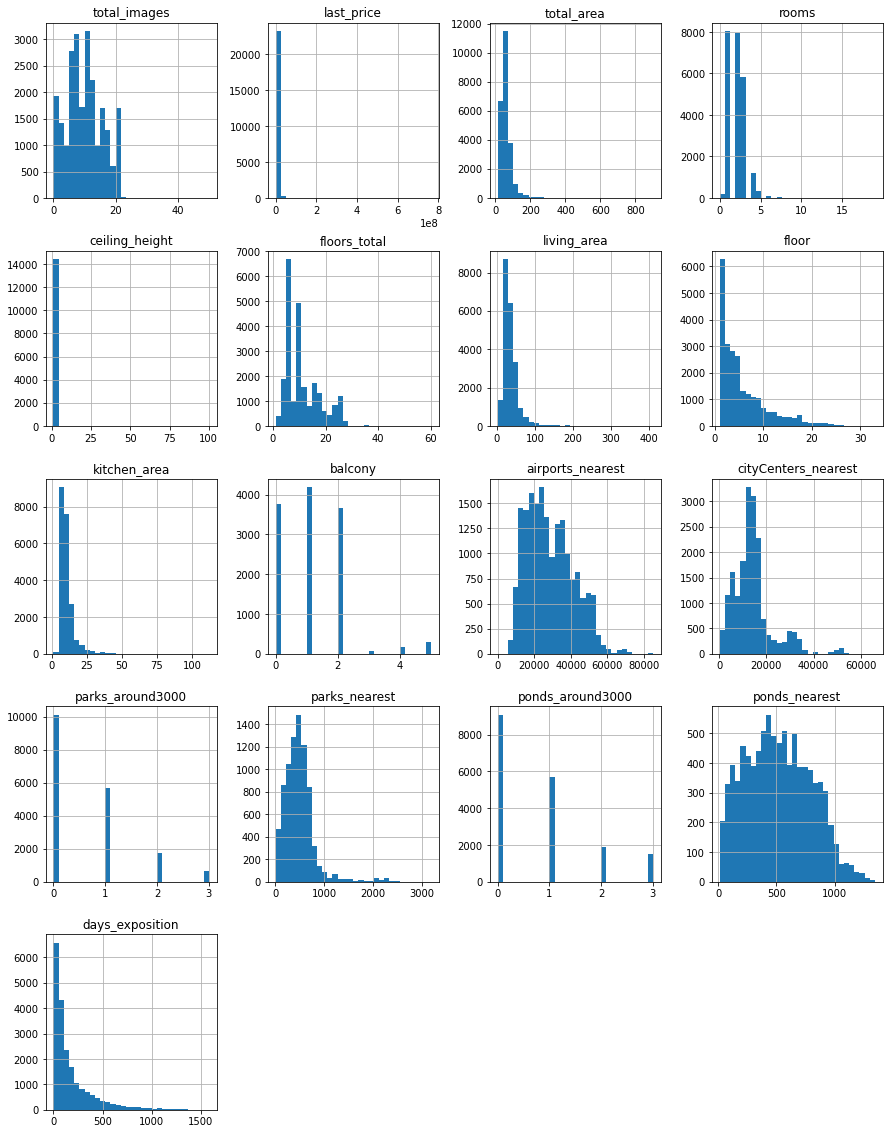

In [7]:
data.hist(bins=30,figsize=(15, 20));

*Let's call the "describe" and "info" methods to continue our acquaintance with the data*

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Data overview' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

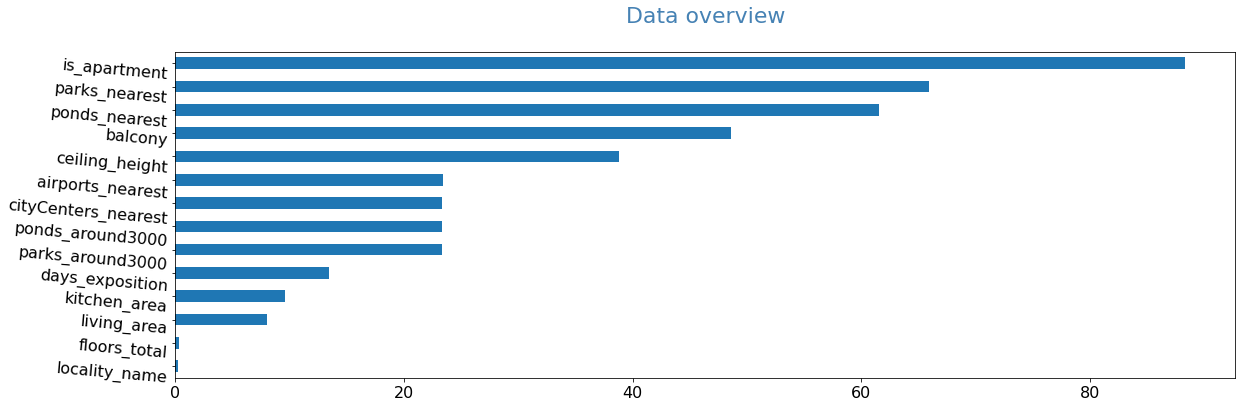

In [11]:
pass_value_barh(data)

<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
   The DataFrame contains 23699 rows, 13 out of 22 columns have gaps in the data, it can already be said about the presence of anomalies, such as the absence of rooms in apartments, or the presence of 19 rooms, the area of ​​​​apartments is 900 m, abnormally high ceilings of 100 m, a 60-storey building, while it is known from open sources that the maximum number of storeys of residential buildings in the region is 37 floors (LCD "Prince Alexander Nevsky"), anomalies can also be attributed to 0 m of the distance to the nearest airport and 1 m to the nearest park, the exposition of the ad is also knocked out for almost five years, which is also confirmed by the histograms.<br/>
    By examining histograms, you can also notice some features in the data. The increase in the number of balconies to more than 4 per apartment seems doubtful. <br/>
    I would also like to draw attention to the lack of information content due to the scale of some histograms, for example, the height of the ceilings, which should be paid attention to during further data processing.<br/>
   Some data types don't match the description, for example "is_apartment" should be a boolean and now it's strings, also strings are ad duration data, and ad date is also indicated by strings.<br/> In addition, the column name "cityCenters_nearest" must be quoted to "snake register".<br/>
    Let's start with data preprocessing.


### Data preprocessing

*We need to get rid of duplicates, find implicit duplicates, rename the column, change the data type where necessary, look for gaps in the data, perhaps fill in those gaps that do not affect the nature of the data and get rid of those gaps that are not important for the task at hand.* 

*1. First of all we will find duplicates*

In [12]:
data.duplicated().mean()

0.0

*There are no obvious duplicates in the data*
<br/> 
*2 . Let's try to identify implicit duplicates in the "locality_name" column with the object data type and process them*

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
data['locality_name'].nunique()

364

In [15]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

*As it shown from these data, the main implicit duplicates are words with "e" and "ё", for example, in the word village, we will get rid of such duplicates and check again for other duplicates:*

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [18]:
data['locality_name'].nunique()

330

*Now there are 330 unique values, so we got rid of 34 incorrect names. <br/> Now we manually check the rest of the values and see that the following combinations are duplicated: 'urban settlement', 'urban-type settlement', for example, 'городской поселок Павлово', 'поселок городского типа Павлово', now we get rid of them and check (repeat code)*

In [19]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

In [21]:
data['locality_name'].nunique()

323

*Now there are 323 unique values, so we got rid of 7 more
wrong names. <br/> Further, when checking, we identify the following duplicates:  1.' 'поселок Мурино', 'Мурино'; 2. 'Кудрово', 'деревня Кудрово'; 3.'Коммунар','Коммунары'; 4.'поселок городского типа Рябово', 'поселок Рябово' 5. 'поселок станции Вещево', 'поселок при железнодорожной станции Вещево' 6. 'поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское' 7.'коттеджный поселок Лесное', 'поселок Лесное, change these values as well - make a dictionary and also use the replace function*

In [22]:
replace_values = {'поселок Мурино':'Мурино', 'деревня Кудрово':'Кудрово','Коммунар':'Коммунары', 'поселок Рябово':'поселок городского типа Рябово' , 'поселок станции Вещево':'поселок при железнодорожной станции Вещево','поселок станции Приветнинское':'поселок при железнодорожной станции Приветнинское','коттеджный поселок Лесное':'поселок Лесное'}
data = data.replace({'locality_name': replace_values})

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунары', 'Колпино', 'поселок городского типа Красный Бор',
       'Гатчина', 'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланц

In [24]:
data['locality_name'].nunique()

317

In [25]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
Мурино                               590
Кудрово                              472
поселок Шушары                       440
Всеволожск                           398
                                   ...  
деревня Пельгора                       1
поселок Каложицы                       1
поселок Платформа 69-й километр        1
поселок Почап                          1
поселок Дзержинского                   1
Name: locality_name, Length: 317, dtype: int64

*Thus, we got rid of all implicit duplicates in the amount of 47 pieces and improved the selection, for example, according to Murino and Kudrovo*

*3. Rename the cityCenters_nearest column to city_centers_nearest with rename()* 

In [26]:
data = data.rename(columns ={'cityCenters_nearest':'city_centers_nearest'})

*3. Next, we start working with gaps. <br/> Call the isna function to find and count gaps.*

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [28]:
data.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

*There are many gaps in the data, the largest number of gaps (88% of the sample) in the "is_apartment" column is most likely due to the fact that the main housing stock is residential real estate, it was simply decided not to indicate this data and it is advisable to fill in these gaps "0", that will not affect the results of the research*

In [29]:
data['is_apartment'] = data['is_apartment'].fillna(0) 

*Since the distances to the park in each locality are different, the number of parks and reservoirs, as well as their presence or absence, can be invested in these gaps, and the airport may be too far from the locality and the program simply did not unload it. These are important metrics, and comparison with the center is one of the tasks of the project, while the sample may not be enough to fill the median value, we will fill all these columns with the so-called "stub" = 5555 in order to easily filter this data in the future. Since this is a cartographic upload, gaps could occur due to the very large distance to the listed objects.*   

In [30]:
temp = ['parks_nearest', 'ponds_nearest', 'airports_nearest', 'days_exposition', 'parks_around3000', 'ponds_around3000']
def filling_data(t):
  data[t] = data[t].fillna (5555)

filling_data (temp)  

In [31]:
data.isna().mean().sort_values(ascending=False)

balcony                 0.486054
ceiling_height          0.387991
city_centers_nearest    0.232879
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
ponds_nearest           0.000000
ponds_around3000        0.000000
parks_nearest           0.000000
parks_around3000        0.000000
airports_nearest        0.000000
open_plan               0.000000
last_price              0.000000
studio                  0.000000
is_apartment            0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
days_exposition         0.000000
dtype: float64

*In the future, we will need the distance to the centers of settlements to calculate the cost of each kilometer, since there are 23% gaps, filling in with medians, we can violate the data, especially considering that the distance for each settlement is different, so we leave this column with gaps*


*Now we need to fill in the gaps with data about balconies: most likely the data is not filled when there is no balcony, so we can also fill them with zero values.* 

In [32]:
data['balcony'] = data['balcony'].fillna(0)

*The height of the ceilings has a fairly clear range (approximately 2.5-3.5). Therefore, in this case, it makes sense to fill in the gaps with the median value.*

In [33]:
ceiling_mediana = data['ceiling_height'].median()


In [34]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_mediana)

*Gaps in the "kitchen area" column are possible in cases where the apartment is a studio and the kitchen is combined with a room. In this case, it makes sense to fill in the gaps with zero values*

In [35]:
data[(data['studio'] == True) &\
                             (data['kitchen_area'].isna())] =\
data[(data['studio'] == True) &\
                             (data['kitchen_area'].isna())].fillna(0)

*Fill in the rest of the gaps in the kitchen area with the median value*

In [36]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

*For the living_area column, we will also fill in the gaps with median values, with the corresponding total area of ​​the apartments, which will not greatly distort the sample* 

In [37]:
koef = data[data['living_area'].isnull() == False]['total_area'].mean() / data[data['living_area'].isnull() == False]['living_area'].mean()
koef
 
data['living_area'] = data['living_area'].fillna(data['total_area'] / koef)

In [38]:
data['living_area'].sort_values().head(20)

3147     0.0000
4901     0.0000
608      0.0000
8454     0.0000
18028    0.0000
5187     0.0000
3874     0.0000
23554    0.0000
5958     0.0000
2409     0.0000
21758    2.0000
13915    2.0000
3242     3.0000
23574    3.0000
17582    5.0000
21943    5.4000
16431    6.0000
19251    6.5000
19546    7.4533
17961    7.4533
Name: living_area, dtype: float64

In [39]:
data = data.query('living_area >8.0')

*We will check the correctness of filling the total area*



In [40]:
data[(data['total_area']*0.9)<= (data['living_area'] +data ['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.00,8,False,False,False,12.00,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.00,8,0,False,False,10.00,1.0,поселок Шушары,18471.0,24272.0,0.0,5555.0,0.0,5555.0,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,0,False,False,6.20,0.0,Санкт-Петербург,13952.0,15031.0,0.0,5555.0,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.00,6,0,False,False,9.00,0.0,Санкт-Петербург,25408.0,16166.0,0.0,5555.0,0.0,5555.0,28.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,0,False,False,9.01,0.0,Санкт-Петербург,22041.0,17369.0,0.0,5555.0,1.0,374.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23442,0,2500000.0,27.7,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,0,False,True,9.01,2.0,Мурино,5555.0,NaN,5555.0,5555.0,5555.0,5555.0,4.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4.0,44.00,2,0,False,False,15.30,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,5555.0,5555.0
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,2.65,10.0,18.00,2,0,False,False,9.01,0.0,Кудрово,5555.0,NaN,5555.0,5555.0,5555.0,5555.0,89.0
23592,10,1450000.0,29.0,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,0,False,True,9.01,2.0,Никольское,5555.0,NaN,5555.0,5555.0,5555.0,5555.0,82.0


*Delete all lines where the location of the object is not known, since it is of no value*    

In [41]:
data['locality_name'] = data['locality_name'].dropna()

In [42]:
data.isna().mean().sort_values(ascending=False)

city_centers_nearest    0.230698
floors_total            0.003506
locality_name           0.002070
total_images            0.000000
kitchen_area            0.000000
ponds_nearest           0.000000
ponds_around3000        0.000000
parks_nearest           0.000000
parks_around3000        0.000000
airports_nearest        0.000000
balcony                 0.000000
open_plan               0.000000
last_price              0.000000
studio                  0.000000
is_apartment            0.000000
floor                   0.000000
living_area             0.000000
ceiling_height          0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
days_exposition         0.000000
dtype: float64

*4.All gaps are processed, now let's deal with anomalies that need to be excluded.*

*Let's process anomalous ceiling heights. To do this, consider values above 8 meters.*

In [43]:
data[data['ceiling_height']>8].sort_values(by='ceiling_height',ascending= False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.00,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,False,False,16.50,4.0,Санкт-Петербург,18838.0,3506.0,0.0,5555.0,3.0,511.0,5555.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,0,False,False,8.00,0.0,Волхов,5555.0,NaN,5555.0,5555.0,5555.0,5555.0,5555.0
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,False,False,11.00,2.0,Санкт-Петербург,42742.0,9760.0,0.0,5555.0,0.0,5555.0,61.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.00,1.0,деревня Нижняя,5555.0,NaN,5555.0,5555.0,5555.0,5555.0,27.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,False,False,9.01,0.0,Санкт-Петербург,41030.0,15543.0,0.0,5555.0,0.0,5555.0,73.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,0,False,True,9.01,2.0,Мурино,5555.0,NaN,5555.0,5555.0,5555.0,5555.0,28.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,0,False,False,9.00,2.0,деревня Мины,5555.0,NaN,5555.0,5555.0,5555.0,5555.0,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,0,False,False,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,5555.0,3.0,80.0,38.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,False,False,8.60,2.0,поселок городского типа Большая Ижора,5555.0,NaN,5555.0,5555.0,5555.0,5555.0,5555.0


*From the data obtained, we conclude that the height of the ceilings is 22.6-32.0 meters - this is most likely an error in the data due to a typo in the decimal fraction. Let's replace these values with more plausible ones from the point of view of reality*

In [44]:
data['ceiling_height'] = data['ceiling_height'].replace({22.6:2.26, 24.000:2.4, 25.000:2.5, 26.000:2.6, 27.000:2.7, 27.500:2.75, 32.000:3.2}).copy()

*Remaining anomalous values in terms of emissions and both anomalously large and small values (minimum value 2.3 according to building codes)*

In [45]:
data = data.query('ceiling_height >=2.3 and ceiling_height < 8.0')


In [46]:
data['ceiling_height'].describe()

count    23651.000000
mean         2.697286
std          0.220643
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

*After checking, we note that the sample has not changed much, while anomalous values have been eliminated.*




*The data also contains values ​​that affect the overall conclusion, namely, too many rooms in some objects. There are apartments with a large number of rooms, but, as can be seen on the graphs, they are rare and, in fact, interfere with the analysis. Therefore, we accept for ourselves the condition that everything that is greater than 7 is outliers. In addition, data on such apartments can also give noise on other indicators, such as price per square meter, average area, ratio of living area to total, etc. In this study, we are interested in the overall picture, and not isolated, rare cases.*

In [47]:
data['rooms'].value_counts()

1     8028
2     7931
3     5807
4     1179
5      326
0      185
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

*We are getting rid of apartments with more than seven rooms.*

In [48]:
data = data.query('rooms < 8')

*Similarly to the situation with rooms, we act in situations with a total area of ​​apartments (we leave less than 300 sq.m.) and with anomalous areas of kitchens (we leave less than 77 sq.m.)*

In [49]:
data[data['total_area']>300].sort_values(by = 'total_area',ascending = False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12859,20,140000000.0,631.20,2019-04-09T00:00:00,7,3.90,4.0,322.300000,4,0,False,False,19.50,1.0,Санкт-Петербург,25707.0,4972.0,0.0,5555.0,2.0,210.0,5555.0
3117,19,140000000.0,631.00,2019-03-30T00:00:00,7,2.65,5.0,361.771711,5,0,False,False,60.00,0.0,Санкт-Петербург,25707.0,4972.0,0.0,5555.0,2.0,210.0,5555.0
15651,20,300000000.0,618.00,2017-12-18T00:00:00,7,3.40,7.0,258.000000,5,0,False,False,70.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,5555.0,2.0,198.0,111.0
4237,1,50000000.0,517.00,2017-10-14T00:00:00,7,2.65,4.0,332.000000,3,0,False,False,22.00,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,5555.0
8018,20,84000000.0,507.00,2015-12-17T00:00:00,5,4.45,7.0,301.500000,7,True,False,False,45.50,1.0,Санкт-Петербург,5555.0,5735.0,2.0,110.0,0.0,5555.0,1078.0
5893,3,230000000.0,500.00,2017-05-31T00:00:00,6,2.65,7.0,286.665381,7,0,False,False,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,5555.0,2.0,198.0,50.0
15016,8,150000000.0,500.00,2016-01-13T00:00:00,4,3.20,7.0,286.665381,7,0,False,False,9.01,0.0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
12401,20,91500000.0,495.00,2017-06-19T00:00:00,7,4.65,7.0,347.500000,7,0,False,False,25.00,0.0,Санкт-Петербург,5555.0,5735.0,2.0,110.0,0.0,5555.0,14.0
9826,1,43185328.0,494.10,2017-05-12T00:00:00,1,2.85,12.0,283.282729,3,0,False,False,9.01,0.0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,5555.0,5.0
22494,7,91075000.0,491.00,2017-05-27T00:00:00,5,4.20,9.0,274.000000,9,0,False,False,45.00,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,5555.0,115.0


In [50]:
data[data['total_area']<15].sort_values(by = 'total_area',ascending = True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,0,False,False,9.01,0.0,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,2.65,5.0,10.0,3,0,False,False,9.01,0.0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19642,5,1190000.0,14.0,2018-07-29T00:00:00,1,2.65,5.0,11.0,1,0,False,False,2.00,0.0,Санкт-Петербург,9898.0,11122.0,0.0,5555.0,0.0,5555.0,4.0


*In cases with a too small total area of ​​apartment, it is not worth getting rid of the values, since these may turn out to be rooms in communal apartments, which is quite common in St. Petersburg and Leningrad region.*

In [51]:
data = data.query('total_area < 400 and kitchen_area < 77')

*With the number of floors of buildings and the number of balconies, we will proceed in the same way as in the case of the number of rooms. We discard anomalous unrealistic values.* 

In [52]:
data = data.query('floors_total < 37 and balcony < 5') 

*Remove objects that are in close proximity to the airport, as this is a clear anomaly* 

In [53]:
data = data.query('airports_nearest > 300') 

*In the same way, we will get rid of emissions associated with parks, since construction is prohibited in parks*

In [54]:
data = data.query('parks_nearest > 50') 

*Let's look at very fast sales, most likely they were simply withdrawn without a sale or filed by mistake*

In [55]:
data[data['days_exposition']<10]['days_exposition'].value_counts(ascending = True).head(20)

2.0      3
6.0    121
8.0    135
9.0    140
5.0    150
3.0    153
4.0    172
7.0    225
Name: days_exposition, dtype: int64

*We will remove all ads in less than three days, because in order to buy a property, you need to inspect it, get acquainted with the documents, make a deposit and sign an agreement or at least agree verbally, and only after that the ad will be removed*

In [56]:
# check
data.shape

(23010, 22)

In [57]:
data = data.query('days_exposition >= 3')

In [58]:
# check
data.shape

(23007, 22)

*Next, we have to deal with the key parameter of our study - the cost of objects at the time of purchase. Let's bring the 'last_price' column into a readable form.*

*We will look at housing options for the minimum cost (less than 500,000)*

In [59]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [60]:
data[ data['last_price'] <500000].sort_values(by= 'last_price').head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.000,109.000,2019-03-20T00:00:00,2,2.750,25.000,32.000,25,0,False,False,40.500,0.000,Санкт-Петербург,36421.000,9176.000,1.000,805.000,0.000,5555.000,8.000
14911,5,430000.000,54.000,2018-06-26T00:00:00,2,2.650,3.000,30.960,3,0,False,False,9.010,0.000,поселок станции Свирь,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,44.000
17456,7,430000.000,30.400,2019-04-22T00:00:00,1,2.650,2.000,16.000,1,0,False,False,6.000,0.000,Сланцы,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,5555.000
16274,18,440000.000,40.000,2018-07-10T00:00:00,1,2.650,5.000,22.933,1,0,False,False,9.010,0.000,деревня Старополье,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,45.000
5698,7,450000.000,42.000,2017-07-31T00:00:00,2,2.650,1.000,23.000,1,0,False,False,5.800,0.000,поселок городского типа Будогощь,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,233.000


*As you can see from the data, only one value looks very unrealistic, so let's get rid of it*

In [61]:
data = data.query('last_price >200000') 

*We apply the method of constructing a distribution histogram and a range diagram using the boxplot method. also consider the basic statistics using the describe method.*

count       23006.000
mean      6306345.447
std       8024455.200
min        430000.000
25%       3400000.000
50%       4600000.000
75%       6700000.000
max     330000000.000
Name: last_price, dtype: float64

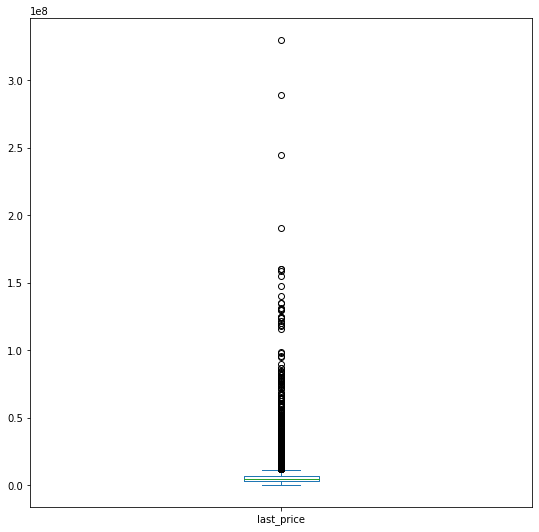

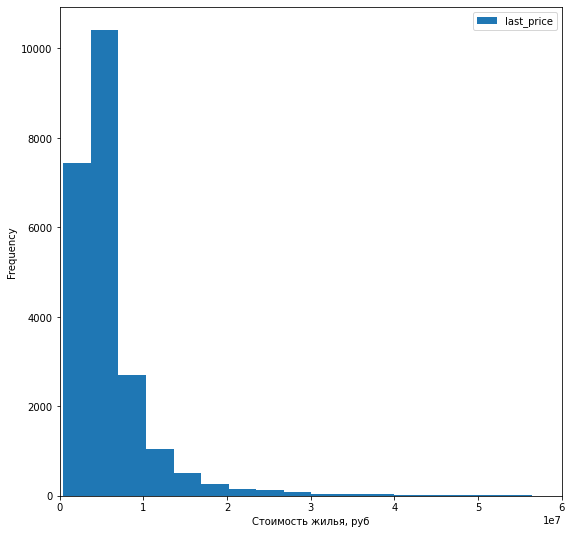

In [62]:
desc = data['last_price'].describe()
data.plot(kind='box', y='last_price', figsize=(9,9))
data.plot(kind='hist',y='last_price', figsize=(9,9), bins=100, xlim=(0,6e7)).set_xlabel('Стоимость жилья, руб')
desc

*Let's call the most expensive real estate options and evaluate the gap among ten values*

In [63]:
data.sort_values(by ='last_price', ascending= False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000.000,190.000,2018-04-04T00:00:00,3,3.500,7.000,95.000,5,0,False,False,40.000,0.000,Санкт-Петербург,23011.000,1197.000,3.000,519.000,3.000,285.000,233.000
22831,18,289238400.000,187.500,2019-03-19T00:00:00,2,3.370,6.000,63.700,6,0,False,False,30.200,0.000,Санкт-Петербург,22494.000,1073.000,3.000,386.000,3.000,188.000,5555.000
16461,17,245000000.000,285.700,2017-04-10T00:00:00,6,3.350,7.000,182.800,4,0,False,False,29.800,0.000,Санкт-Петербург,33143.000,6235.000,3.000,400.000,3.000,140.000,249.000
8900,13,190870000.000,268.000,2016-03-25T00:00:00,3,2.650,8.000,132.000,7,0,False,False,40.000,0.000,Санкт-Петербург,32440.000,5297.000,0.000,5555.000,2.000,198.000,901.000
19155,20,160000000.000,243.000,2018-11-12T00:00:00,5,2.650,5.000,145.000,4,0,False,False,33.000,0.000,Санкт-Петербург,22640.000,555.000,3.000,285.000,1.000,200.000,18.000
2536,16,159984000.000,242.400,2015-08-27T00:00:00,4,3.850,9.000,131.000,7,0,False,False,20.000,0.000,Санкт-Петербург,21946.000,2242.000,1.000,679.000,1.000,227.000,501.000
16495,12,159000000.000,260.000,2017-04-04T00:00:00,4,2.650,5.000,180.000,4,0,False,False,30.000,2.000,Санкт-Петербург,21740.000,436.000,2.000,138.000,3.000,620.000,178.000
1026,20,155000000.000,310.000,2018-10-12T00:00:00,5,5.300,3.000,190.000,3,0,False,False,63.000,2.000,Санкт-Петербург,24899.000,4785.000,0.000,5555.000,1.000,603.000,5555.000
22229,16,148000000.000,256.000,2016-03-16T00:00:00,5,2.650,6.000,179.000,5,0,False,False,36.000,0.000,Санкт-Петербург,24072.000,3639.000,2.000,727.000,3.000,462.000,233.000
12674,16,140000000.000,241.000,2015-07-24T00:00:00,5,3.000,5.000,138.173,4,0,False,False,9.010,0.000,Санкт-Петербург,23512.000,3503.000,3.000,413.000,3.000,83.000,399.000


*You can see the difference between the first and fifth values almost twice, so let's calculate the data more than 190,000,0000 outliers and get rid of them*

In [64]:
data = data.query('last_price <190000000') 

In [65]:
data['last_price'].describe()

count       23002.000
mean      6261571.818
std       7239295.475
min        430000.000
25%       3400000.000
50%       4600000.000
75%       6700000.000
max     160000000.000
Name: last_price, dtype: float64

*The median is still very different from the mean. For a more accurate study, it is necessary to prepare data slices separately for St. Petersburg and Leningrad. region. Similarly, we construct a histogram and a range chart.* 

count       15186.000
mean      7676171.649
std       8433708.979
min       1190000.000
25%       4200000.000
50%       5500000.000
75%       8000000.000
max     160000000.000
Name: last_price, dtype: float64

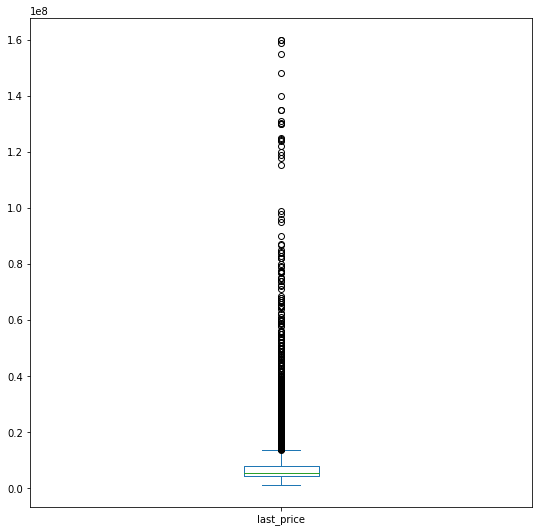

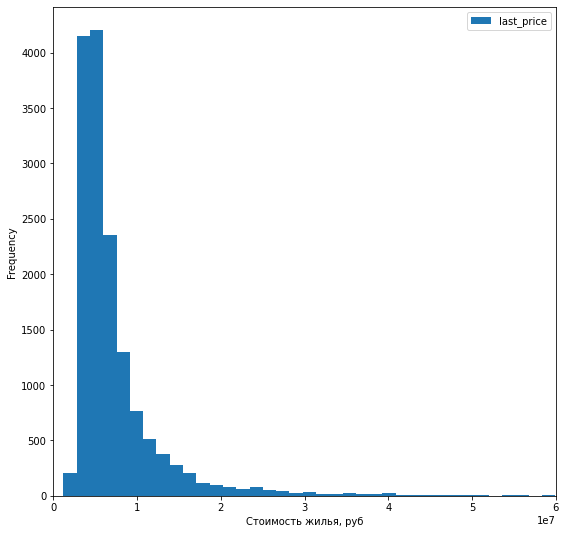

In [66]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург'] 
desc = data_spb['last_price'].describe()
data_spb.plot(kind='box', y='last_price', figsize=(9,9))
data_spb.plot(kind='hist',y='last_price', figsize=(9,9), bins=100, xlim=(0,6e7)).set_xlabel('Стоимость жилья, руб')
desc

count       7816.000
mean     3513092.668
std      2143912.684
min       430000.000
25%      2350000.000
50%      3150000.000
75%      4200000.000
max     42000000.000
Name: last_price, dtype: float64

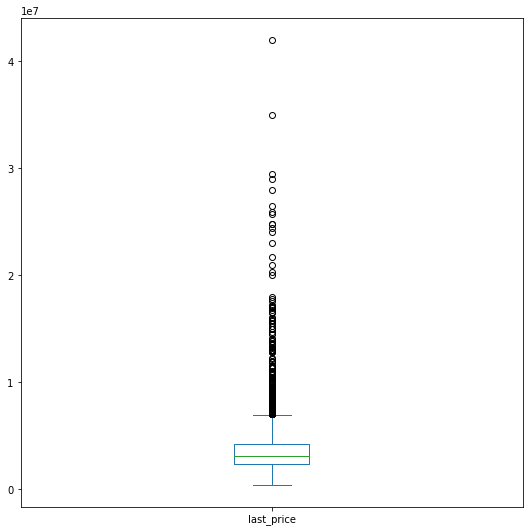

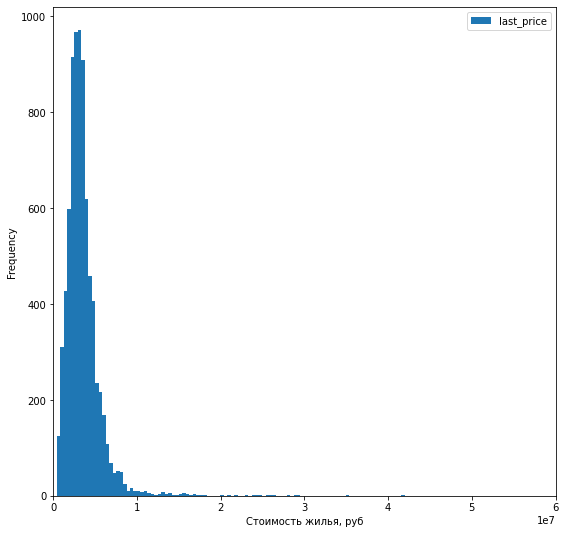

In [67]:
data_lo = data[data['locality_name'] != 'Санкт-Петербург'] 
desc = data_lo['last_price'].describe()
data_lo.plot(kind='box', y='last_price', figsize=(9,9))
data_lo.plot(kind='hist',y='last_price', figsize=(9,9), bins=100, xlim=(0,6e7)).set_xlabel('Стоимость жилья, руб')
desc

*When split, the histograms have a smoother appearance, while the sample is not greatly affected. Let's call the .describe() method and check again for anomalies.*

In [68]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23002.000,23002.000,23002.000,23002.000,23002.000,23002.000,23002.000,23002.000,23002.000,23002.000,23002.000,17621.000,23002.000,23002.000,23002.000,23002.000,23002.000
mean,9.861,6261571.818,59.324,2.051,2.696,10.647,34.053,5.853,10.262,0.537,23271.388,14137.415,1312.049,3867.607,1312.177,3630.016,898.443
std,5.668,7239295.475,31.256,1.028,0.219,6.589,20.118,4.860,5.325,0.824,14795.302,8614.939,2358.952,2391.168,2358.881,2452.867,1839.623
min,0.000,430000.000,12.000,0.000,2.300,1.000,8.300,1.000,0.000,0.000,5555.000,0.000,0.000,51.000,0.000,13.000,3.000
25%,6.000,3400000.000,40.000,1.000,2.600,5.000,19.000,2.000,7.200,0.000,10025.000,9148.000,0.000,616.000,0.000,640.000,45.000
50%,9.000,4600000.000,51.700,2.000,2.650,9.000,30.000,4.000,9.010,0.000,21785.000,13094.000,1.000,5555.000,1.000,5555.000,124.000
75%,14.000,6700000.000,69.000,3.000,2.700,16.000,42.000,8.000,11.300,1.000,34233.750,16293.000,3.000,5555.000,3.000,5555.000,388.000
max,50.000,160000000.000,399.000,7.000,6.000,36.000,255.700,33.000,75.000,4.000,84869.000,65968.000,5555.000,5555.000,5555.000,5555.000,5555.000


*Thus, the main anomalies and outliers have been removed, everything else can be processed during the analysis, now it is necessary to change the data types in some columns.<br/> <br/>*

In [183]:
# check



(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,002.00","23,002.00","23,002.00","23,002.00","23,002.00","23,002.00","23,002.00","23,002.00","23,002.00"
min,0.00,12.00,2.30,3.00,"430,000.00",8.30,0.00,1.00,1.00
max,7.00,399.00,6.00,"5,555.00","160,000,000.00",255.70,75.00,33.00,36.00


*5. Changing data types*

*First, change the data type in the is_apartment column to "boolean", as it says in the description, at the moment the column contains data of type "object"*

In [184]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [71]:
data['is_apartment'].unique()

array([False,  True])

*Then, we replace the values of one of the "first_day_exposition" columns, which are key for our tasks, with the "datetime" type, since in the future we will be interested in the months in which ads were published. It is with this data type "datetime" that we will be able to carry out further analysis.*  

In [72]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [185]:
 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')


In [74]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

*Let's change the data on the number of balconies and floors in the building to integer*

In [186]:
data['floors_total'] = data['floors_total'].astype('int')

In [187]:
data['balcony'] = data['balcony'].astype('int')

*Let's display information about the dataframe data types and make sure of the replacements.* 

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23002 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23002 non-null  int64         
 1   last_price            23002 non-null  float64       
 2   total_area            23002 non-null  float64       
 3   first_day_exposition  23002 non-null  datetime64[ns]
 4   rooms                 23002 non-null  int64         
 5   ceiling_height        23002 non-null  float64       
 6   floors_total          23002 non-null  int64         
 7   living_area           23002 non-null  float64       
 8   floor                 23002 non-null  int64         
 9   is_apartment          23002 non-null  bool          
 10  studio                23002 non-null  bool          
 11  open_plan             23002 non-null  bool          
 12  kitchen_area          23002 non-null  float64       
 13  balcony         

*Thus, all types of values are aligned with the description of the columns* 

<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
   <br/> When pre-preparing the data, the following was done:
     <br/>Removed implicit duplicates.
     <br/>The names of the columns have been changed.
     <br/>Filled data gaps based on parameters.
     <br/>The data is free from outliers and anomalies to a degree that does not affect the sample.
     <br/>Where it is necessary, data types are changed.
     <br/>DataFrame prepared for further research and analysis.
    

### Calculate the data and add new columns to the table

*First, let's add a new column 'price_sq_m' that contains the cost per square meter of housing. Divide the column 'last_price'(sales price) by 'total_area'(total area)*



In [188]:
data['price_sq_m']=data['last_price']/data['total_area']

*Проверяем результат методом .describe(). Построим диаграмму размаха.*

count    23002.000
mean     98705.546
std      45269.782
min       7962.963
25%      76388.889
50%      94797.784
75%     113886.418
max     995983.936
Name: price_sq_m, dtype: float64

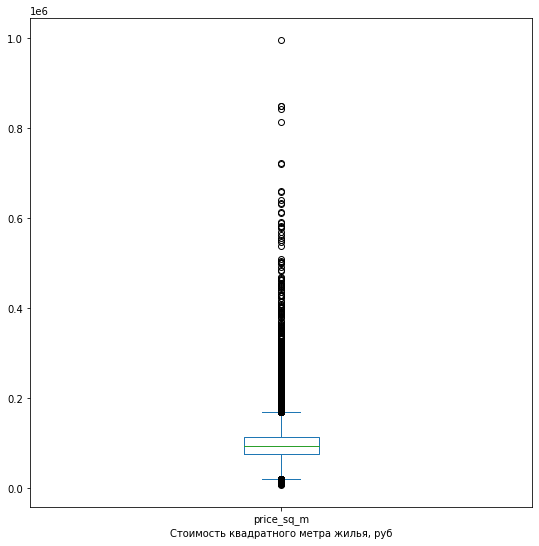

In [189]:
desc = data['price_sq_m'].describe()
data['price_sq_m'].plot(kind='box', y='price_sq_m', figsize=(9,9)).set_xlabel('Стоимость квадратного метра жилья, руб')
desc

*To further check the duration of the publication time of ads, create new columns
<br/>day of the week, month and year of ad publication, these columns will be created by transforming the information contained in "first_day_exposition".*

In [80]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [81]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [82]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday

*We call the .head() method on each new column and on the 'first_day_exposition' column to make sure the information is correct.*

In [83]:
data['day_exposition'].head() 

0    3
1    1
2    3
3    4
4    1
Name: day_exposition, dtype: int64

In [84]:
data['month_exposition'].head()

0     3
1    12
2     8
3     7
4     6
Name: month_exposition, dtype: int64

In [85]:
data['year_exposition'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64

In [86]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

*We confirm that 2019-03-07 is indeed Thursday. The transformation is correct.*

* Let's group the number of storeys of buildings with a breakdown:
<br/>'last'
<br/>'first'
<br/>'other'
<br/> For this we will create a function "floor_group".*

In [190]:
def floor_group(fl):
    
    if fl['floor'] == fl['floors_total'] and  fl['floor'] == 1:
        return 'first'
    if fl['floor'] == fl['floors_total']:
        return 'last'
    if fl['floor'] == 1:
        return 'first'
    
    return 'other' 

data['floor_type'] = data.apply(floor_group, axis=1) 

 *Appropriate floor type for single storey
buildings should be registered as the first, since the comfort of living in the form of sounds and dust makes it more related to the first floor, so add the line if fl['floor'] == fl['floors_total'] and fl['floor'] = to the loop = 1: return 'first', and also check how this is now output:*

In [88]:
data[(data['floor']==1)&(data['floors_total']==1)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,month_exposition,year_exposition,day_exposition,floor_type
3076,20,2000000.000,80.000,2018-01-03,3,2.650,1,48.500,1,False,False,False,10.000,0,Волосово,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,44.000,25000.000,1,2018,2,первый
4379,5,5300000.000,58.500,2017-11-15,2,2.650,1,31.600,1,False,False,False,9.400,0,поселок городского типа Рощино,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,226.000,90598.291,11,2017,2,первый
5300,5,2990000.000,60.000,2018-11-15,3,2.650,1,50.000,1,False,False,False,10.000,0,поселок при железнодорожной станции Вещево,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,40.000,49833.333,11,2018,3,первый
5698,7,450000.000,42.000,2017-07-31,2,2.650,1,23.000,1,False,False,False,5.800,0,поселок городского типа Будогощь,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,233.000,10714.286,7,2017,0,первый
5787,16,9000000.000,88.000,2018-08-06,3,2.650,1,50.453,1,False,False,False,9.010,0,Санкт-Петербург,44870.000,20802.000,0.000,5555.000,1.000,792.000,60.000,102272.727,8,2018,0,первый


*Checking the data:*

In [191]:
data['floor_type'].unique()

array(['other', 'first', 'last'], dtype=object)

*Let's create a distance column to the city center in kilometers 'city_cent_km' by dividing the 'city_centers_nearest' column by 1000 and rounding the values to integers. Recall that the 'city_centers_nearest' column will contain 23% of the gaps, which will be moved to the new column to keep the data clean.*

In [90]:
data['city_cent_km'] = data['city_centers_nearest']/1000

data['city_cent_km'] = data['city_cent_km'].round(0)
   
    

In [91]:
data['city_cent_km'].head()

0   16.000
1   19.000
2   14.000
3    7.000
4    8.000
Name: city_cent_km, dtype: float64

<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
   <br/>According to the results of the transformations, calculated columns were made: the price of one square meter;
<br/>day of the week when the announcement was published (0 — Monday, 1 — Tuesday, and so on);
<br/>month of announcement publication;
<br/>year of publication of the announcement;
<br/>type of apartment floor (values — “first”, “last”, “other”);
<br/>distance to the city center in kilometers.
  <br/> These columns will play an important role in the exploratory data analysis that will be presented later.
    

### Exploratory data analysis

*We need to split the data into two data frames, as the sample for St. Petersburg is larger, and it is also assumed that the cost of housing in St. Petersburg is generally higher. Let's check this assertion. We create two separate dataframes and look at the parameters of the cost per square meter of housing for the regions separately.* 

In [192]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

In [193]:
data_spb['price_sq_m'].describe()

count    15186.000
mean    114071.257
std      45399.692
min      15345.269
25%      90909.091
50%     104634.124
75%     124206.282
max     995983.936
Name: price_sq_m, dtype: float64

In [194]:
data_lo = data[data['locality_name'] != 'Санкт-Петербург']

In [195]:
data_lo['price_sq_m'].describe()

count     7816.000
mean     68850.929
std      26010.002
min       7962.963
25%      51720.771
50%      68733.011
75%      85135.135
max     640422.350
Name: price_sq_m, dtype: float64

*As can be seen from the data, the average and median cost per square meter in St. Petersburg and the Leningrad region are very different, in the future we will look at most of the parameters for these regions separately.*

*Let's start exploring the data from the total area, call the .describe() method, a histogram and a box plot for the 'total_area' column for two regions*

In [196]:
data_spb['total_area'].describe()

count   15186.000
mean       63.406
std        34.829
min        12.000
25%        41.800
50%        54.700
75%        74.000
max       399.000
Name: total_area, dtype: float64

In [197]:
data_lo['total_area'].describe()

count   7816.000
mean      51.392
std       20.567
min       15.000
25%       37.000
50%       46.700
75%       60.700
max      380.000
Name: total_area, dtype: float64

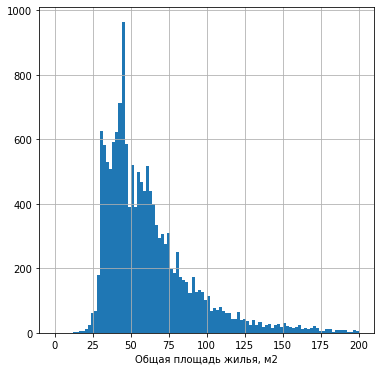

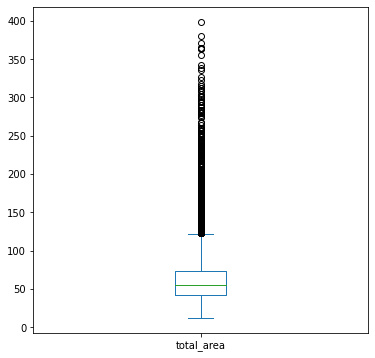

In [198]:
data_spb['total_area'].hist(bins=100,figsize=(6,6), range=(0,200)).set_xlabel('Общая площадь жилья, м2')
plt.show()
data_spb['total_area'].plot(kind = 'box', figsize=(6,6));

*In this case, it can be said for sure that the area of apartments for sale and apparently the quantitative composition of rooms in St. Petersburg and the region is different. In St. Petersburg, the area and housing stock consists of apartments of a larger area, which is clearly traced by the average and median values of the areas.*

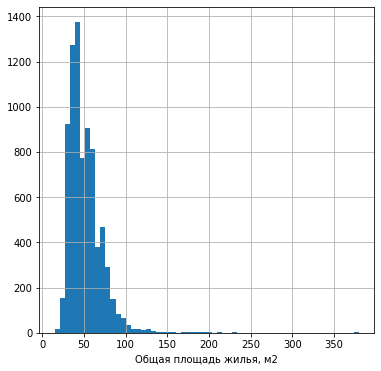

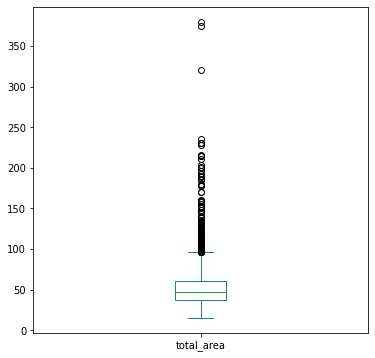

In [199]:
data_lo['total_area'].hist(bins=60,figsize=(6,6)).set_xlabel('Общая площадь жилья, м2')
plt.show()
data_lo['total_area'].plot(kind = 'box', figsize=(6,6));

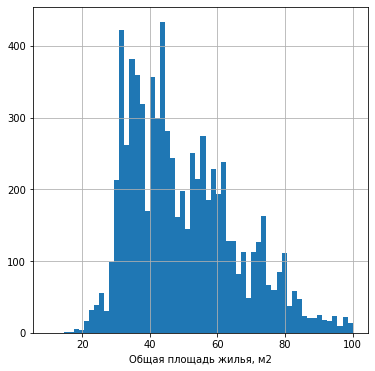

In [200]:
data_lo['total_area'].hist(bins=60,range=(10,100),figsize=(6,6)).set_xlabel('Общая площадь жилья, м2');

*Area histograms generally look like a Poisson distribution. There are dips at the points, which in general can be explained by a change in the areas at the boundaries of the number of rooms in apartments. That is, on average, a one-room apartment is 30-40 square meters, followed by two-room apartments 44-60. It is in these places (between the areas of 1 room square and 2 room square) that declines are observed. There is a similar trend between apartments with a different composition of rooms.*

*Next, we will study the data regarding living area*

In [201]:
data_spb['living_area'].describe()

count   15186.000
mean       36.491
std        22.356
min         8.300
25%        20.000
50%        31.100
75%        44.000
max       255.700
Name: living_area, dtype: float64

In [202]:
data_lo['living_area'].describe()

count   7816.000
mean      29.314
std       13.641
min        8.400
25%       18.000
50%       28.000
75%       36.584
max      239.400
Name: living_area, dtype: float64

*The median value of living area does not differ much. The minimum and maximum values are plausible.*

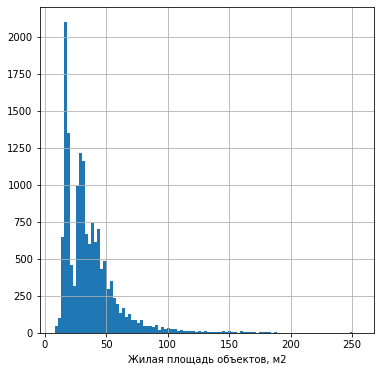

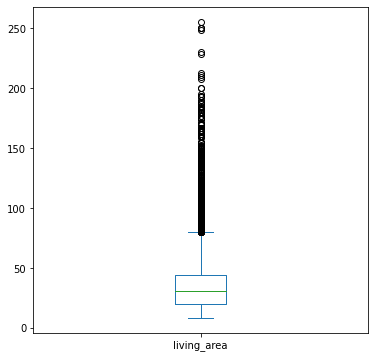

In [203]:
data_spb['living_area'].hist(bins=100,figsize=(6,6)).set_xlabel('Жилая площадь объектов, м2')
plt.show()
data_spb['living_area'].plot(kind = 'box', figsize=(6,6));

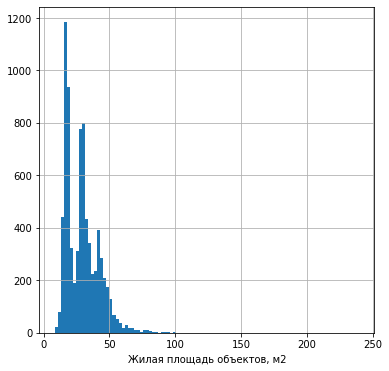

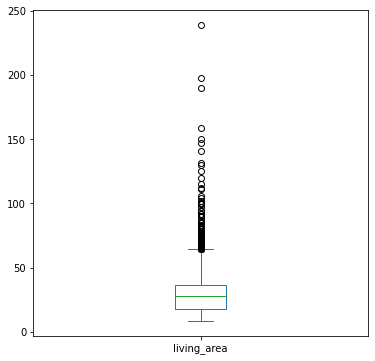

In [204]:
data_lo['living_area'].hist(bins=100,figsize=(6,6)).set_xlabel('Жилая площадь объектов, м2')
plt.show()
data_lo['living_area'].plot(kind = 'box', figsize=(6,6));

*Histograms have a dip in the region of 20-25 square meters, which can be explained by the transition from studios and one-room apartments to two-room apartments.*

*Consider the area of ​​kitchens*

In [205]:
data_spb['kitchen_area'].describe()

count   15186.000
mean       10.783
std         5.857
min         0.000
25%         7.400
50%         9.010
75%        12.000
max        75.000
Name: kitchen_area, dtype: float64

In [206]:
data_lo['kitchen_area'].describe()

count   7816.000
mean       9.252
std        3.903
min        0.000
25%        7.000
50%        9.000
75%       10.355
max       64.000
Name: kitchen_area, dtype: float64

*The mean and median values generally do not differ between St. Petersburg and the region. The minimum value equal to zero is natural based on the filling of gaps in the data by studios with zeros*

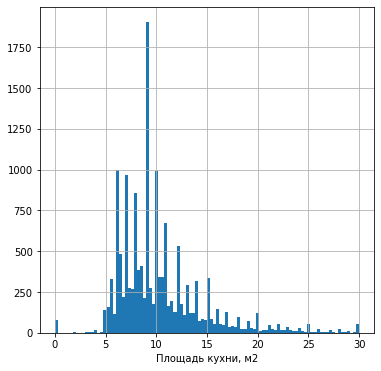

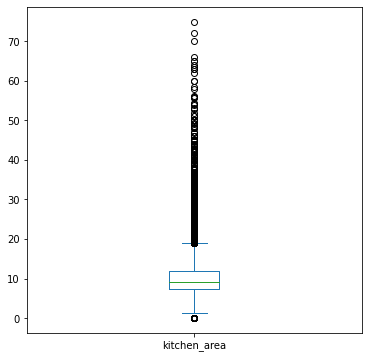

In [207]:
data_spb['kitchen_area'].hist(bins=100,figsize=(6,6), range=(0,30)).set_xlabel('Площадь кухни, м2')

plt.show()
data_spb['kitchen_area'].plot(kind = 'box', figsize=(6,6));

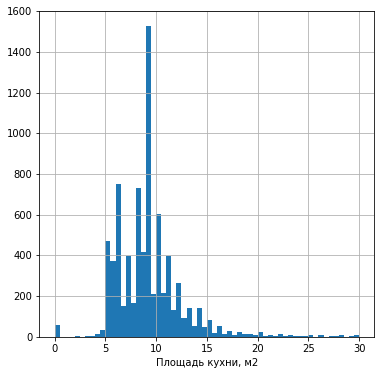

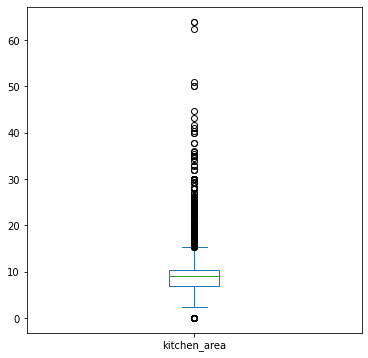

In [208]:
data_lo['kitchen_area'].hist(bins=60,figsize=(6,6),range=(0,30)).set_xlabel('Площадь кухни, м2')
plt.show()
data_lo['kitchen_area'].plot(kind = 'box', figsize=(6,6));

*The histograms of St. Petersburg and the region in terms of the area of kitchens are also similar, there is a dip in the kitchens of about 9 meters, otherwise no anomalies were found.* 

*Next, consider the selling price*

In [209]:
data_spb['last_price'].describe()

count       15186.000
mean      7676171.649
std       8433708.979
min       1190000.000
25%       4200000.000
50%       5500000.000
75%       8000000.000
max     160000000.000
Name: last_price, dtype: float64

In [210]:
data_lo['last_price'].describe()

count       7816.000
mean     3513092.668
std      2143912.684
min       430000.000
25%      2350000.000
50%      3150000.000
75%      4200000.000
max     42000000.000
Name: last_price, dtype: float64

*The average and median value for the price in St. Petersburg and the region differ almost twice. What indicates the correct decision when dividing the city and the region for review and analysis of data.*

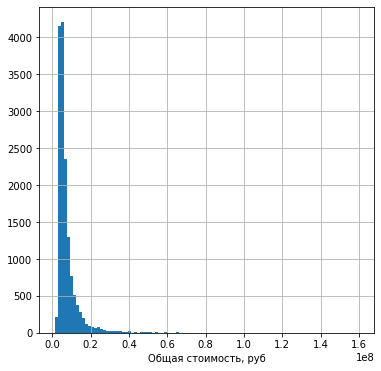

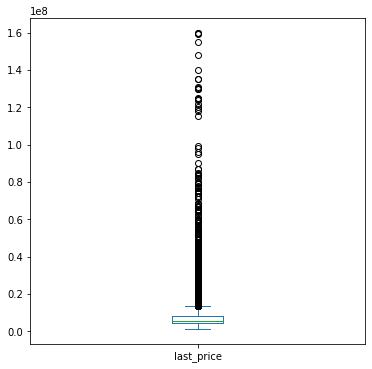

In [211]:
data_spb['last_price'].hist(bins=100,figsize=(6,6)).set_xlabel('Общая стоимость, руб')
plt.show()
data_spb['last_price'].plot(kind = 'box', figsize=(6,6));

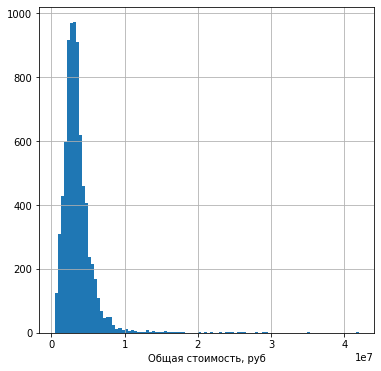

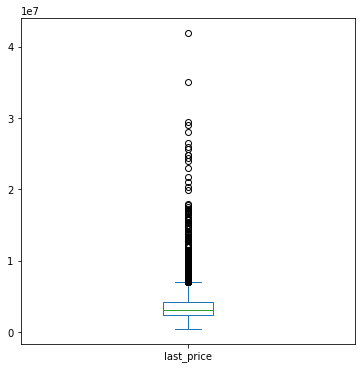

In [212]:
data_lo['last_price'].hist(bins=100,figsize=(6,6)).set_xlabel('Общая стоимость, руб')
plt.show()
data_lo['last_price'].plot(kind = 'box', figsize=(6,6));

*Histograms are similar and close to the Poisson distribution.*

 *Let's look at the data on the rooms in the ads.*

In [213]:
data_spb['rooms'].describe()

count   15186.000
mean        2.148
std         1.081
min         0.000
25%         1.000
50%         2.000
75%         3.000
max         7.000
Name: rooms, dtype: float64

In [214]:
data_lo['rooms'].describe()

count   7816.000
mean       1.863
std        0.886
min        0.000
25%        1.000
50%        2.000
75%        2.000
max        7.000
Name: rooms, dtype: float64

*Medians and means are similar. Zeros are explained by the lack of rooms in the studios.*

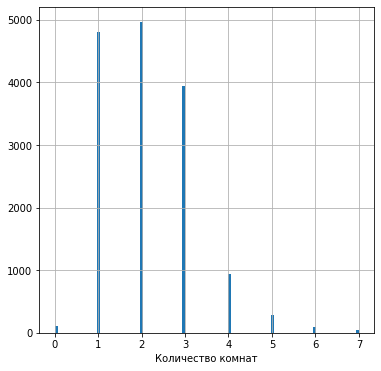

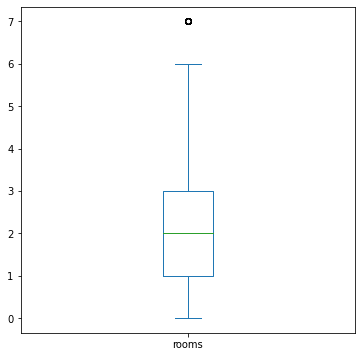

In [215]:
data_spb['rooms'].hist(bins=100,figsize=(6,6)).set_xlabel('Количество комнат')
plt.show()
data_spb['rooms'].plot(kind = 'box', figsize=(6,6));

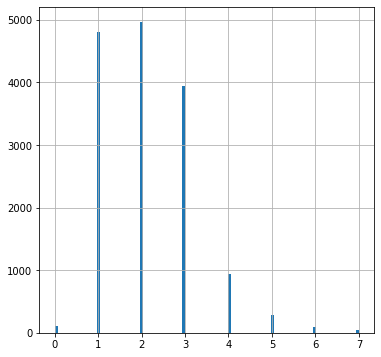

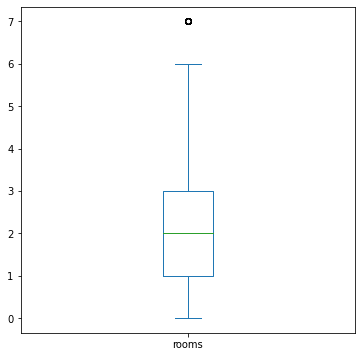

In [216]:
data_spb['rooms'].hist(bins=100,figsize=(6,6))
plt.show()
data_spb['rooms'].plot(kind = 'box', figsize=(6,6));

*According to the histograms, it can be seen that there are most advertisements among two-room apartments. They appear most often in advertisements.*

*Below we consider a selection of ceiling heights.*

In [217]:
data_spb['ceiling_height'].describe()

count   15186.000
mean        2.722
std         0.246
min         2.300
25%         2.600
50%         2.650
75%         2.750
max         6.000
Name: ceiling_height, dtype: float64

In [218]:
data_lo['ceiling_height'].describe()

count   7816.000
mean       2.645
std        0.141
min        2.300
25%        2.590
50%        2.650
75%        2.650
max        5.000
Name: ceiling_height, dtype: float64

*Mean and median values are similar and generally reflect building codes.*

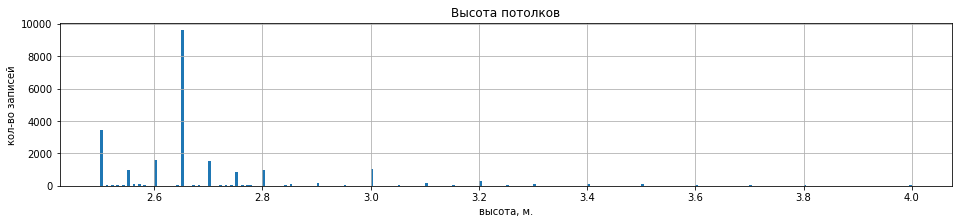

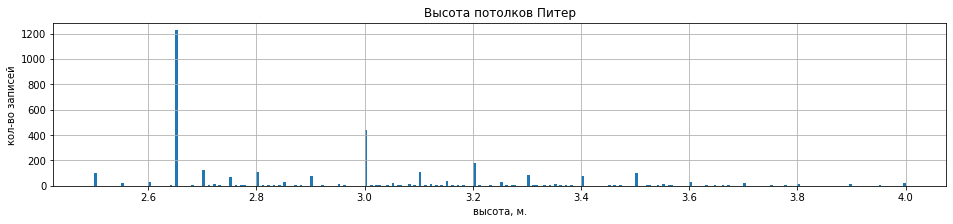

In [219]:
# check
# построим график значений для столбца с высотой потолков

import matplotlib.pyplot as plt

(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(2.5,4.0), grid=True, title='Высота потолков', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'высота, м.')
)
plt.show()


(
    data_spb.query('city_cent_km < 8')['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(2.5,4.0), grid=True, title='Высота потолков Питер', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'высота, м.')
)
plt.show()

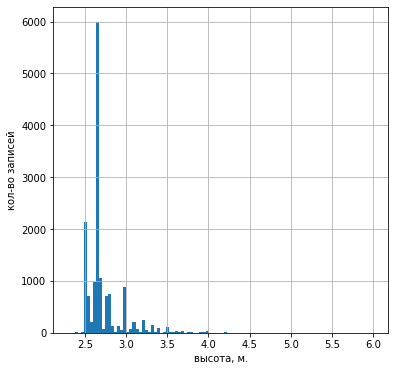

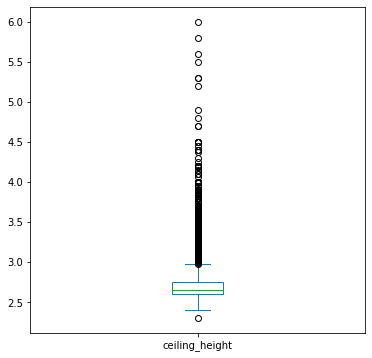

In [220]:
data_spb['ceiling_height'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'высота, м.')
plt.show()
data_spb['ceiling_height'].plot(kind = 'box', figsize=(6,6))

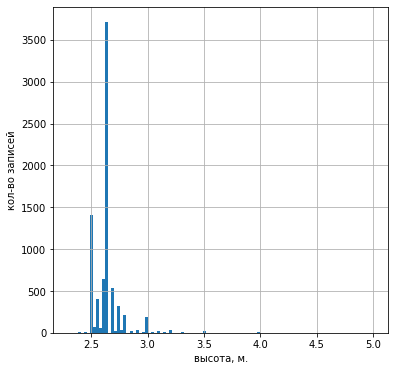

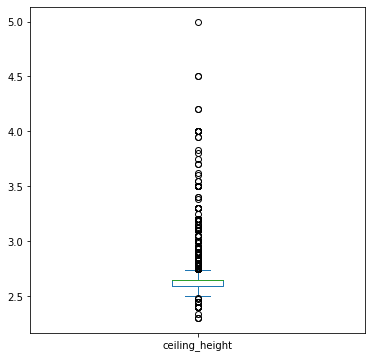

In [221]:
data_lo['ceiling_height'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'высота, м.')
plt.show()
data_lo['ceiling_height'].plot(kind = 'box', figsize=(6,6));

*The bar charts clearly show the most popular ceiling value, around 2.75, which also reflects building codes.*

*Consider the data on the number of floors.*

In [222]:
data_spb['floor'].describe()

count   15186.000
mean        6.191
std         4.862
min         1.000
25%         3.000
50%         5.000
75%         8.000
max        33.000
Name: floor, dtype: float64

In [223]:
data_lo['floor'].describe()

count   7816.000
mean       5.198
std        4.788
min        1.000
25%        2.000
50%        4.000
75%        6.000
max       27.000
Name: floor, dtype: float64

*In general, the number of storeys of apartments for sale is similar in St. Petersburg and the region. 75% of ads in St. Petersburg sell apartments below the 8th floor, which indicates the predominance of low-rise apartments, and rare ads with sales of high-rise apartments, in the region this figure is even lower than the third quartile - 6th floor.* 

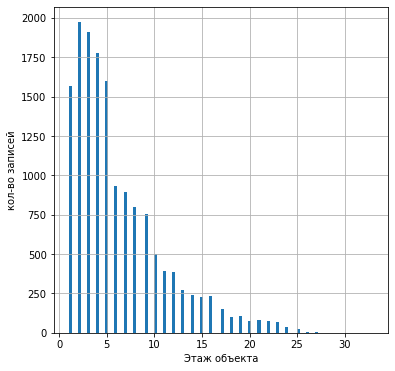

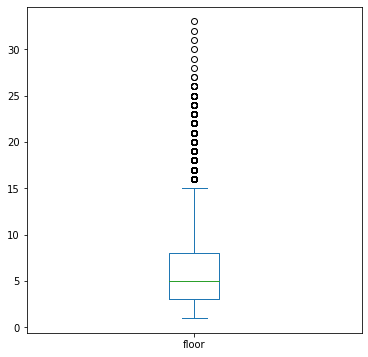

In [224]:
data_spb['floor'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Этаж объекта')
plt.show()
data_spb['floor'].plot(kind = 'box', figsize=(6,6));

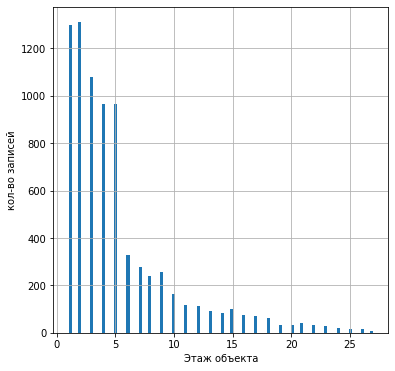

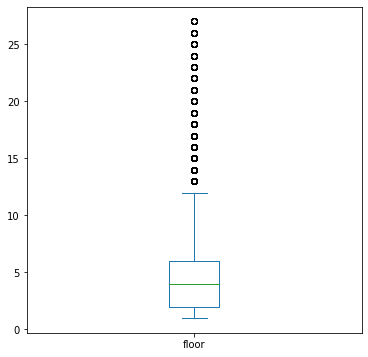

In [225]:
data_lo['floor'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Этаж объекта')
plt.show()
data_lo['floor'].plot(kind = 'box', figsize=(6,6));

*It follows from the Histograms that both in the region and in St. Petersburg there are the most ads for the sale of apartments on the second floor, there are also many on the first and third, this thesis will help us confirm the column "floor type", which we will study below*

In [226]:
t_spb=data_spb[data_spb['days_exposition']!= 5555]
t_spb.groupby(['floor_type'])['days_exposition'].agg(['count','mean','median'])

,count,mean,median
floor_type,,,
first,1337,199.500,112.000
last,1576,194.781,104.000
other,10272,178.247,91.000


In [227]:
t_lo=data_lo[data_lo['days_exposition']!= 5555]
t_lo.groupby(['floor_type'])['days_exposition'].agg(['count','mean','median'])

,count,mean,median
floor_type,,,
first,1088,203.454,117.500
last,1167,191.645,102.000
other,4490,167.343,90.000


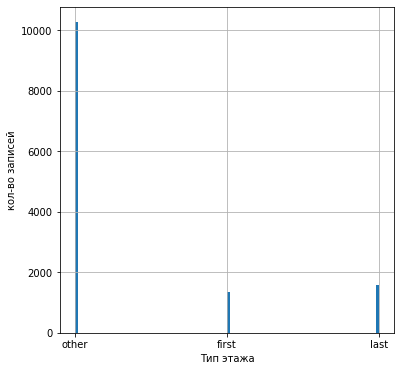

In [228]:
t_spb['floor_type'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Тип этажа');


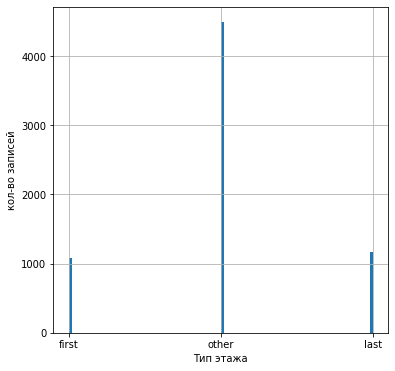

In [229]:
t_lo['floor_type'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Тип этажа');

*As can be seen from the data of the pivot tables and histograms, the first and last floors are not so popular for sale, the first ones are exhibited less often, and these types of apartments are sold 20% longer than on the "other" floor group, below we will consider the number of storeys of buildings*

In [230]:
data_spb['floors_total'].describe()

count   15186.000
mean       11.363
std         6.364
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        36.000
Name: floors_total, dtype: float64

In [231]:
data_lo['floors_total'].describe()

count   7816.000
mean       9.258
std        6.794
min        1.000
25%        5.000
50%        5.000
75%       12.000
max       29.000
Name: floors_total, dtype: float64

*In 75% of the buildings of St. Petersburg in our sample, 16-storey buildings and below are concentrated, in the region this figure is 12 floors, it can be seen from the indicators that in the region the buildings presented are lower*

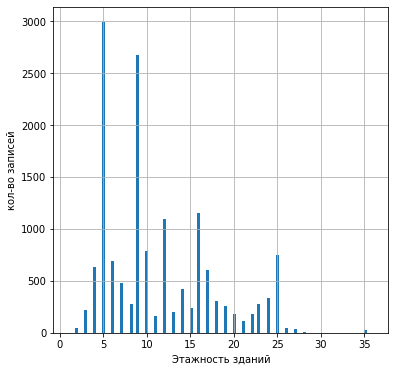

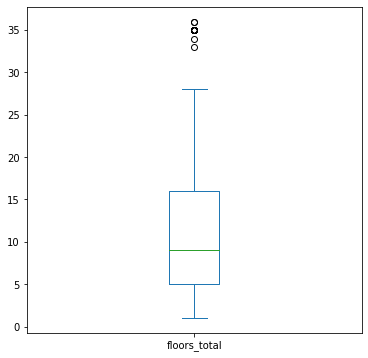

In [232]:
data_spb['floors_total'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Этажность зданий')
plt.show()
data_spb['floors_total'].plot(kind = 'box', figsize=(6,6));

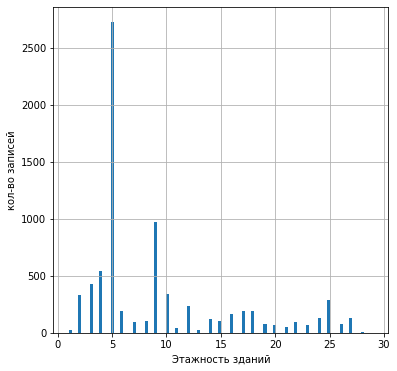

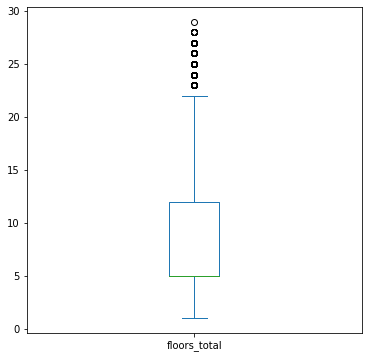

In [233]:
data_lo['floors_total'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Этажность зданий')
plt.show()
data_lo['floors_total'].plot(kind = 'box', figsize=(6,6));

*It can be seen from the histograms that 5 and 9 storey buildings predominate in the two regions, which is easily explained by the peculiarities of Soviet development*

*now consider the data on the proximity of objects from the city center, excluding missing values*

In [234]:
data_spb[~data_spb['city_centers_nearest'].isna()]['city_centers_nearest'].describe()

count   15128.000
mean    11592.510
std      4843.057
min       181.000
25%      8311.000
50%     12256.000
75%     14951.000
max     29493.000
Name: city_centers_nearest, dtype: float64

In [235]:
data_lo[~data_lo['city_centers_nearest'].isna()]['city_centers_nearest'].describe()

count    2493.000
mean    29580.383
std     10221.834
min         0.000
25%     23688.000
50%     30227.000
75%     33517.000
max     65968.000
Name: city_centers_nearest, dtype: float64

*The data for St. Petersburg, which we will analyze further, say that 50% of the sample is concentrated 12 km from the center of St. Petersburg, but the data for the region is more difficult to interpret, because there is some value located directly in the center, and if we say about the centers of settlements, then this is possible, but if this is still a link to the center of St. Petersburg, then this is an outlier.* 

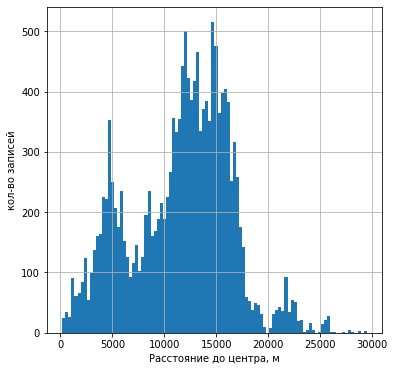

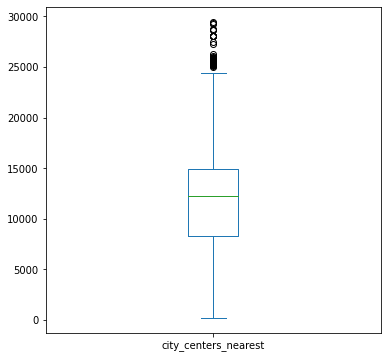

In [236]:
data_spb[~data_spb['city_centers_nearest'].isna()]['city_centers_nearest'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Расстояние до центра, м')
plt.show()
data_spb[~data_spb['city_centers_nearest'].isna()]['city_centers_nearest'].plot(kind = 'box', figsize=(6,6));

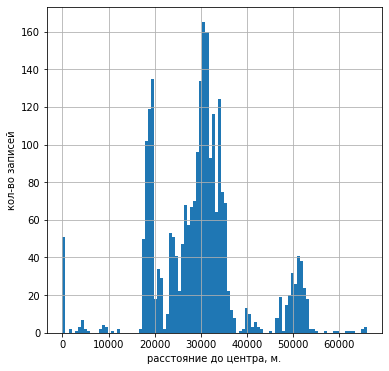

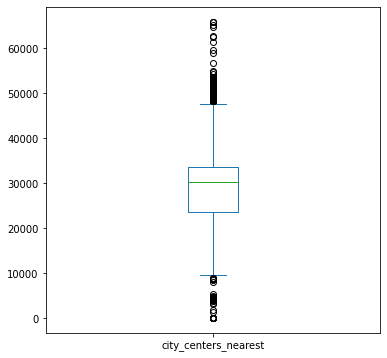

In [237]:
data_lo[~data_lo['city_centers_nearest'].isna()]['city_centers_nearest'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'расстояние до центра, м.')
plt.show()
data_lo[~data_lo['city_centers_nearest'].isna()]['city_centers_nearest'].plot(kind = 'box', figsize=(6,6));

*According to the chart of the range of data in St. Petersburg, we can say with confidence that the data are reliable from 0 to 25000, we also observe a peak in the region of five km, which is difficult to interpret, in the Leningrad region it is still more difficult, but we emphasize once again that here the question is the correctness of the data relative to the center settlements or a metropolis, in this case, data clarification is required.*

*Below we will consider the data on the distance to the nearest airport, excluding our marker 5555 from the data*

In [238]:
data_spb[data_spb['airports_nearest']!= 5555]['airports_nearest'].describe()

count   15106.000
mean    28032.227
std     11544.457
min      6450.000
25%     18582.750
50%     26688.500
75%     36575.750
max     54784.000
Name: airports_nearest, dtype: float64

In [239]:
data_lo[data_lo['airports_nearest']!= 5555]['airports_nearest'].describe()

count    2443.000
mean    33377.905
std     17151.538
min      9294.000
25%     18557.000
50%     26634.000
75%     52480.000
max     84869.000
Name: airports_nearest, dtype: float64

*Half of the objects are located at a distance of 26 kilometers. The most remote 54 km St. Petersburg and 84 km in the Len region.*

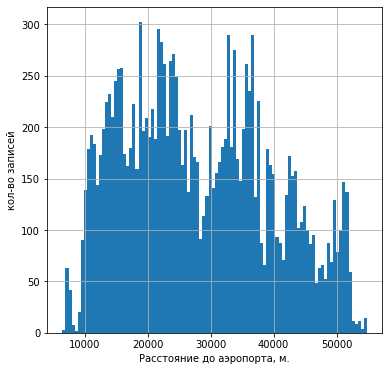

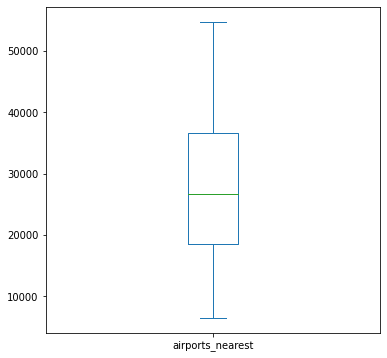

In [240]:
data_spb[data_spb['airports_nearest']!= 5555]['airports_nearest'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Расстояние до аэропорта, м.')
plt.show()
data_spb[data_spb['airports_nearest']!= 5555]['airports_nearest'].plot(kind = 'box', figsize=(6,6));

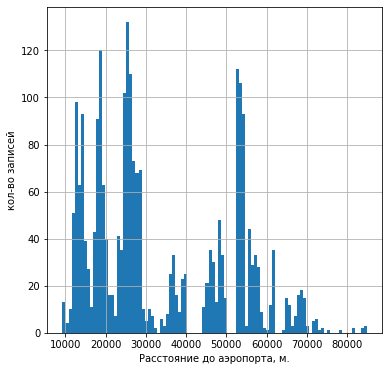

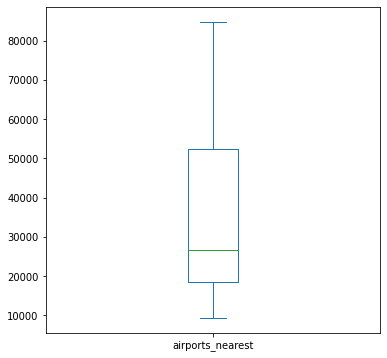

In [241]:
data_lo[data_lo['airports_nearest']!= 5555]['airports_nearest'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Расстояние до аэропорта, м.')
plt.show()
data_lo[data_lo['airports_nearest']!= 5555]['airports_nearest'].plot(kind = 'box', figsize=(6,6));

*According to the histograms, it can be noted that the objects in St. Petersburg are approximately equidistant from the airports, and a stronger spread is observed across the region. What is characterized by a cartographic location.*

*Let's consider data of distance from parks.*

In [242]:
data_spb[data_spb['parks_nearest']!= 5555]['parks_nearest'].describe()

count   6933.000
mean     508.645
std      340.903
min       51.000
25%      309.000
50%      469.000
75%      622.000
max     3190.000
Name: parks_nearest, dtype: float64

In [243]:
data_lo[data_lo['parks_nearest']!= 5555]['parks_nearest'].describe()

count    748.000
mean     438.647
std      297.635
min       51.000
25%      245.000
50%      394.500
75%      545.000
max     2131.000
Name: parks_nearest, dtype: float64

*In St. Petersburg and the region, parks are located within walking distance (300-500) meters from objects, which is a fairly comfortable indicator of life.*

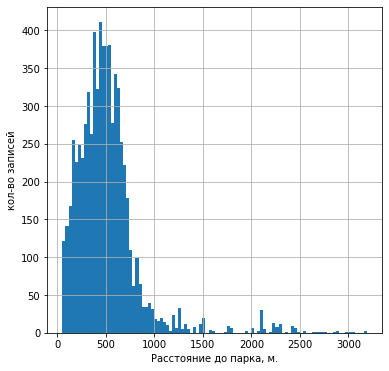

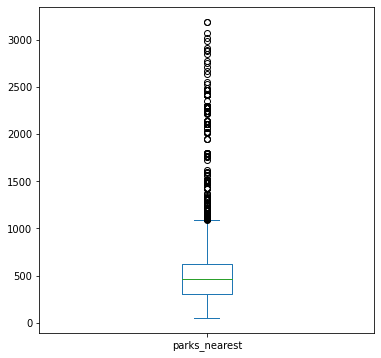

In [244]:
data_spb[data_spb['parks_nearest']!= 5555]['parks_nearest'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Расстояние до парка, м.')
plt.show()
data_spb[data_spb['parks_nearest']!= 5555]['parks_nearest'].plot(kind = 'box', figsize=(6,6));

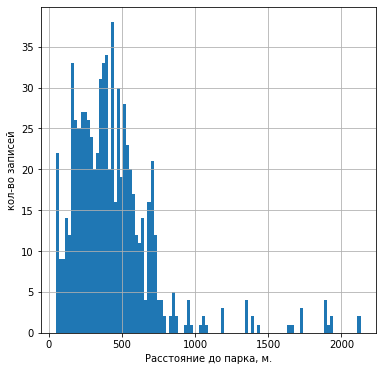

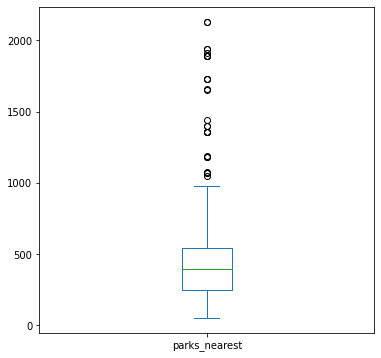

In [245]:
data_lo[data_lo['parks_nearest']!= 5555]['parks_nearest'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Расстояние до парка, м.')
plt.show()
data_lo[data_lo['parks_nearest']!= 5555]['parks_nearest'].plot(kind = 'box', figsize=(6,6));

*The histograms have a distribution close to normal, however, there are several peaks around 500 meters.*

*Next, consider what days of the week ads were most often placed.*

In [246]:
data['day_exposition'].describe()

count   23002.000
mean        2.566
std         1.787
min         0.000
25%         1.000
50%         3.000
75%         4.000
max         6.000
Name: day_exposition, dtype: float64

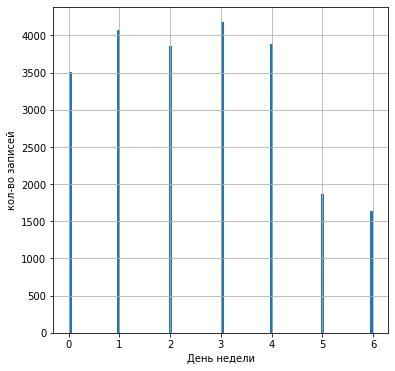

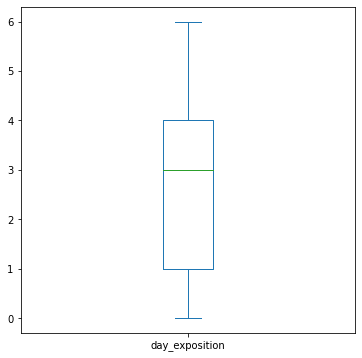

In [247]:
data['day_exposition'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'День недели')
plt.show()
data['day_exposition'].plot(kind = 'box', figsize=(6,6));

*On Saturday and Sunday, ads are placed less often, but on Thursday they give more ads.*

In [248]:
data['month_exposition'].describe()

count   23002.000
mean        6.402
std         3.492
min         1.000
25%         3.000
50%         6.000
75%        10.000
max        12.000
Name: month_exposition, dtype: float64

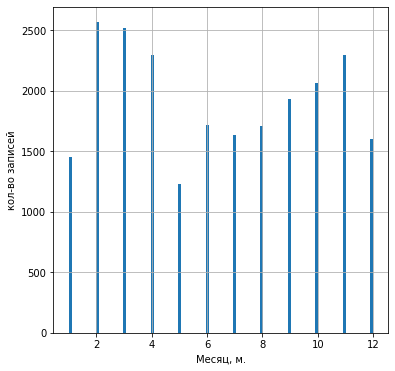

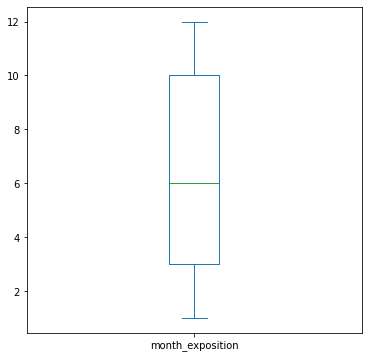

In [249]:
data['month_exposition'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Месяц, м.')
plt.show()
data['month_exposition'].plot(kind = 'box', figsize=(6,6));

*The most popular months for home sales are February, March, April, October and November, but the holiday months - December, January and May, on the contrary, are the least popular.*  

*Next, we will examine the data of the days_exposition column, that is, how many ads hung before they were withdrawn from sale, recall that gaps in this column mean that the ad is most likely active*



In [250]:
data_spb[data_spb['days_exposition']!= 5555]['days_exposition'].describe()

count   13185.000
mean      182.378
std       224.490
min         3.000
25%        42.000
50%        95.000
75%       231.000
max      1572.000
Name: days_exposition, dtype: float64

In [251]:
data_lo[data_lo['days_exposition']!= 5555]['days_exposition'].describe()

count   6745.000
mean     177.373
std      209.665
min        3.000
25%       45.000
50%       96.000
75%      232.000
max     1580.000
Name: days_exposition, dtype: float64

In [252]:
data[data['days_exposition']!= 5555]['days_exposition'].describe()

count   19930.000
mean      180.684
std       219.592
min         3.000
25%        45.000
50%        95.000
75%       231.000
max      1580.000
Name: days_exposition, dtype: float64

*The data shows that they do not depend much on the region, the median is 95 and 96 days, and in 75% of cases the apartments will be sold within 230.0 days, 25% of sales take place in the first 45 days, it is interesting that there are apartments that were sold for three days of publication, let's look at the relationship between the number of rooms and the exposure of the ad:* 

In [253]:
data[data['days_exposition']!= 5555].pivot_table(index='rooms', values ='days_exposition', aggfunc = ['count', 'mean', 'median', 'min'] )

,count,mean,median,min
,days_exposition,days_exposition,days_exposition,days_exposition
rooms,,,,
0,172,109.477,47.000,3.000
1,7128,158.791,80.500,3.000
2,6756,173.614,92.000,3.000
3,4618,204.335,115.000,3.000
4,914,255.462,156.000,3.000
5,240,305.433,179.500,4.000
6,71,289.592,204.000,8.000
7,31,207.484,138.000,9.000


*This table shows that studios sell faster and, in general, small-room apartments sell faster, while the selection is clearly insufficient for 6.7-room apartments.* 

*Let's display the Top 20 longest ads*

In [254]:
long_exp = data[data['days_exposition'] > 600]
long_exp[long_exp['days_exposition']!= 5555].sort_values(by='days_exposition', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,month_exposition,year_exposition,day_exposition,floor_type,city_cent_km
18843,11,3500000.000,48.200,2014-12-15,2,2.500,5,27.400,2,False,False,False,7.700,3,деревня Новое Девяткино,5555.000,NaN,5555.000,5555.000,5555.000,5555.000,1580.000,72614.108,12,2014,0,other,NaN
1109,1,34878556.000,95.800,2014-12-09,2,2.650,6,58.300,5,True,False,False,20.000,1,Санкт-Петербург,21860.000,318.000,2.000,160.000,3.000,569.000,1572.000,364076.785,12,2014,1,other,0.000
9553,11,10600000.000,80.000,2014-12-09,3,2.850,17,44.000,9,False,False,False,15.000,0,Санкт-Петербург,17101.000,17110.000,0.000,5555.000,0.000,5555.000,1553.000,132500.000,12,2014,1,other,17.000
1885,2,13300000.000,79.600,2014-12-09,2,3.000,8,42.700,7,False,False,False,18.000,0,Санкт-Петербург,39393.000,11096.000,1.000,537.000,0.000,5555.000,1513.000,167085.427,12,2014,1,other,11.000
20969,18,13300000.000,133.000,2015-02-11,4,3.000,5,58.000,2,False,False,False,45.000,0,Санкт-Петербург,24653.000,5032.000,0.000,5555.000,1.000,534.000,1512.000,100000.000,2,2015,2,other,5.000
6691,3,4400000.000,42.980,2014-12-12,1,2.650,5,18.720,1,False,False,False,11.310,0,Пушкин,19715.000,30358.000,1.000,439.000,3.000,232.000,1512.000,102373.197,12,2014,4,first,30.000
14093,7,9500000.000,100.000,2015-02-19,4,3.000,5,76.000,5,False,False,False,10.000,0,Санкт-Петербург,25950.000,4798.000,1.000,690.000,0.000,5555.000,1497.000,95000.000,2,2015,3,last,5.000
15313,1,9278000.000,139.800,2014-12-28,4,2.800,5,80.152,4,False,False,False,9.010,0,Сестрорецк,54416.000,35515.000,0.000,5555.000,0.000,5555.000,1489.000,66366.237,12,2014,6,other,36.000
19123,9,5990000.000,82.000,2015-02-19,3,3.000,4,60.000,2,False,False,False,8.000,0,Павловск,22465.000,34619.000,0.000,5555.000,2.000,458.000,1485.000,73048.780,2,2015,3,other,35.000
11955,4,11400000.000,76.000,2014-12-09,2,2.650,9,36.000,3,False,False,False,14.000,0,Санкт-Петербург,39393.000,11096.000,1.000,537.000,0.000,5555.000,1484.000,150000.000,12,2014,1,other,11.000


*As you can see, such a long period could have been affected by both an overpriced price, since even at the time of sale the cost per square meter was 93,000 rubles and the total cost is more than the median values, it is also possible that these ads were simply forgotten to be removed from the database.* 

*Consider the histogram and range chart of this indicator*

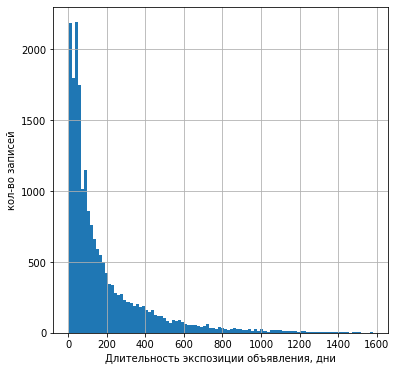

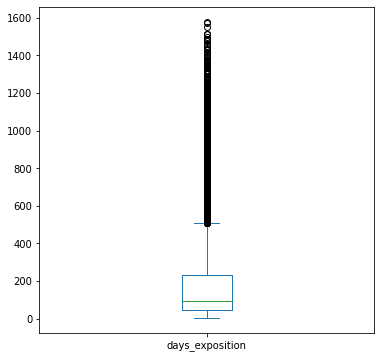

In [255]:
data[data['days_exposition']!= 5555]['days_exposition'].hist(bins=100,figsize=(6,6)).set( ylabel = 'кол-во записей', xlabel = 'Длительность экспозиции объявления, дни')
plt.show()
data[data['days_exposition']!= 5555]['days_exposition'].plot(kind = 'box', figsize=(6,6));

*The range diagram shows that a normal ad lasts no more than 600 days, and most apartments according to the histogram are sold in the first six months, there are no abnormally fast sales, and even on the day of publication, you can sell an apartment, although in practice this is impossible.*

#### What factors most influence the total (full) cost of an object?

*Consider the relationship of factors affecting the cost of apartments, first of all, take the parameters:
<br/>- total area;
  <br/> - living area;
  <br/> - kitchen area;
  <br/> - number of rooms;*

In [256]:
data_spb.pivot_table(index='rooms', values ='last_price', aggfunc = ['count', 'mean', 'median'] )

,count,mean,median
,last_price,last_price,last_price
rooms,,,
0,104,4238831.731,3300000.000
1,4814,4466921.707,4100000.000
2,4964,6676665.355,5600000.000
3,3944,9472575.711,7100000.000
4,945,14729388.516,10000000.000
5,277,23768399.863,14300000.000
6,93,26141169.075,18777000.000
7,45,26415333.333,22450000.000


In [257]:
data_lo.pivot_table(index='rooms', values ='last_price', aggfunc = ['count', 'mean', 'median'] )

,count,mean,median
,last_price,last_price,last_price
rooms,,,
0,80,2287914.375,2320000.000
1,3076,2806242.882,2800000.000
2,2789,3470781.111,3300000.000
3,1628,4507246.817,4200000.000
4,200,6129377.500,4695000.000
5,35,7180542.857,5900000.000
6,6,16399200.000,14250000.000
7,2,24950000.000,24950000.000


*In the data on the dependence of price on the number of rooms, an increase in price is traced. At the same time, the sample for a large number of rooms is insufficient.*

In [283]:
print(
    'Correlation coefficient between cost and number of rooms in St. Petersburg:',
    data_spb[data_spb['rooms']<6]['rooms'].corr(data_spb['last_price']).round(3)
)
print(
    'Correlation coefficient between total area and cost in St. Petersburg:',
    data_spb['total_area'].corr(data_spb['last_price']).round(3)
)
print(
    'Correlation coefficient between living space and cost in St. Petersburg:',
    data_spb[(data_spb['total_area']*0.9)>= (data_spb['living_area'] +data_spb ['kitchen_area'])]['living_area'].corr(data_spb['last_price']).round(3)
)
print(
    'Correlation coefficient between kitchen area and cost in St. Petersburg:',
    data_spb['kitchen_area'].corr(data_spb['last_price']).round(3)
)

Correlation coefficient between cost and number of rooms in St. Petersburg: 0.411
Correlation coefficient between total area and cost in St. Petersburg: 0.741
Correlation coefficient between living space and cost in St. Petersburg: 0.665
Correlation coefficient between kitchen area and cost in St. Petersburg: 0.511


In [284]:
print(
    'Correlation coefficient between the cost and the number of rooms in the Leningrad region:',
    data_lo[data_lo['rooms']<5]['rooms'].corr(data_lo['last_price']).round(3)
)
print(
    'Correlation coefficient between total area and cost in the Leningrad region:',
    data_lo['total_area'].corr(data_lo['last_price']).round(3)
)
print(
    'Correlation coefficient between living space and cost in the Leningrad region:',
     data_lo[(data_lo['total_area']*0.9)>= (data_lo['living_area'] +data_lo ['kitchen_area'])]['living_area'].corr(data_lo['last_price']).round(3)
)
print(
    'Correlation coefficient between kitchen area and cost in the Leningrad region:',
    data_lo['kitchen_area'].corr(data_lo['last_price']).round(3)
)

Correlation coefficient between the cost and the number of rooms in the Leningrad region: 0.374
Correlation coefficient between total area and cost in the Leningrad region: 0.706
Correlation coefficient between living space and cost in the Leningrad region: 0.584
Correlation coefficient between kitchen area and cost in the Leningrad region: 0.54


*The greatest linear relationship between the total area and cost in both St. Petersburg and the Leningrad region. The correlation coefficient in this case is 0.7, then between living space and cost (about 0.6). The smallest between the cost and the number of rooms (about 0.4).*

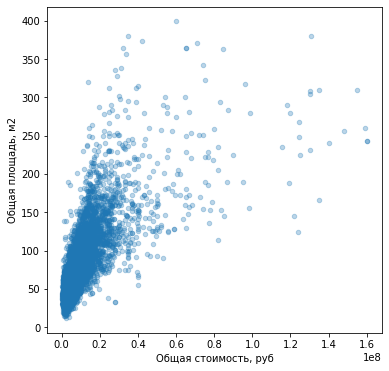

In [260]:
data.plot(y='total_area', x='last_price', kind='scatter', figsize=(6, 6), alpha=0.3, xlabel='Общая стоимость, руб', ylabel='Общая площадь, м2');

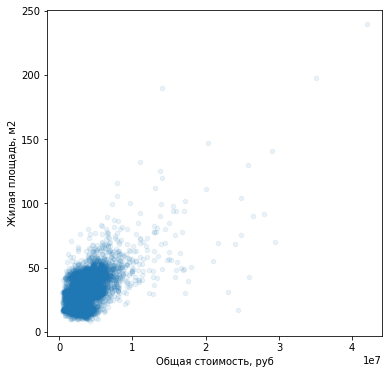

In [261]:
data[(data['total_area']*0.9)>= (data['living_area'] +data_lo ['kitchen_area'])].plot(y='living_area', x='last_price', kind='scatter', figsize=(6, 6), alpha=0.09, xlabel='Общая стоимость, руб', ylabel='Жилая площадь, м2');

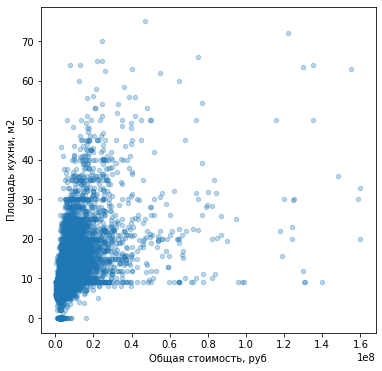

In [262]:
data.plot(y='kitchen_area', x='last_price', kind='scatter', figsize=(6, 6), alpha=0.3, xlabel='Общая стоимость, руб', ylabel='Площадь кухни, м2');

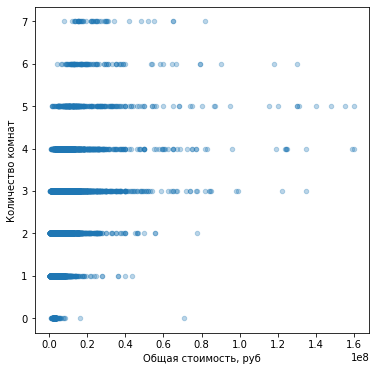

In [263]:
data.plot(y='rooms', x='last_price', kind='scatter', figsize=(6, 6), alpha=0.3, xlabel='Общая стоимость, руб', ylabel='Количество комнат');

*As can be seen from the scatterplots, most total and living area values increase with price. There are also other factors that affect the price, but they are less pronounced. The area of kitchens has a similar distribution, but it is already clear that there is almost no linear dependence, but the dependence of the cost on rooms is similar to a histogram, which indicates a weak dependence on this indicator*

*Consider the relationship between cost and floor type.*

In [264]:
data_spb.groupby(['floor_type'])['last_price'].agg(['count','mean','median'])

,count,mean,median
floor_type,,,
first,1565,5997602.319,4850000.000
last,1831,8573194.452,5550000.000
other,11790,7759675.656,5600000.000


In [265]:
data_lo.groupby(['floor_type'])['last_price'].agg(['count','mean','median'])

,count,mean,median
floor_type,,,
first,1296,3088566.012,2750000.000
last,1414,3382351.955,2850000.000
other,5106,3657051.523,3300000.000


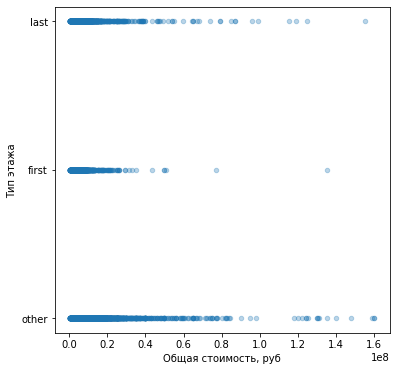

In [266]:
data.plot(y='floor_type', x='last_price', kind='scatter', figsize=(6, 6), alpha=0.3, xlabel='Общая стоимость, руб', ylabel='Тип этажа');

*It is clearly seen that the first floor is usually the cheapest, followed by the last floors. Which, in general, perfectly characterizes the convenience of living and safety, as well as technical costs (lack of balconies, the presence of elevators, the strength of the roof.*

*Dependence of the Price on the day, month and year of publication.*

In [267]:
data_spb.pivot_table(index='day_exposition', values ='last_price', aggfunc = ['count', 'mean', 'median'] )

,count,mean,median
,last_price,last_price,last_price
day_exposition,,,
0,2286,7720050.983,5500000.000
1,2750,7478339.308,5450000.000
2,2568,7434920.505,5500000.000
3,2761,8167493.175,5600000.000
4,2572,7647655.216,5450000.000
5,1195,7529319.075,5450000.000
6,1054,7634006.632,5400000.000


In [268]:
data_lo.pivot_table(index='day_exposition', values ='last_price', aggfunc = ['count', 'mean', 'median'] )

,count,mean,median
,last_price,last_price,last_price
day_exposition,,,
0,1219,3542330.847,3290000.000
1,1319,3533704.062,3100000.000
2,1291,3602987.754,3200000.000
3,1418,3478965.006,3100000.000
4,1316,3541992.512,3220000.000
5,666,3331266.556,2990000.000
6,587,3432299.981,3190000.000


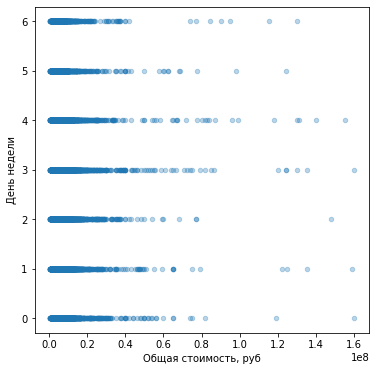

In [269]:
data.plot(y='day_exposition', x='last_price', kind = 'scatter', figsize=(6, 6), alpha=0.3, xlabel='Общая стоимость, руб', ylabel='День недели');

In [270]:
data_spb.pivot_table(index='month_exposition', values ='last_price', aggfunc = ['count', 'mean', 'median'] )

,count,mean,median
,last_price,last_price,last_price
month_exposition,,,
1,895,8032593.886,5650000.000
2,1685,7618159.494,5500000.000
3,1633,7481969.383,5600000.000
4,1559,7518929.808,5500000.000
5,826,7629279.408,5475000.000
6,1113,7777504.212,5300000.000
7,1103,8000881.230,5300000.000
8,1160,7583219.593,5465000.000


In [271]:
data_lo.pivot_table(index='month_exposition', values ='last_price', aggfunc = ['count', 'mean', 'median'] )

,count,mean,median
,last_price,last_price,last_price
month_exposition,,,
1,559,3616038.640,3250000.000
2,881,3478662.355,3100000.000
3,884,3446332.079,3110000.000
4,732,3496747.805,3150000.000
5,407,3429790.123,3200000.000
6,604,3370155.242,3080000.000
7,532,3558661.068,3120000.000
8,545,3577936.961,3190000.000


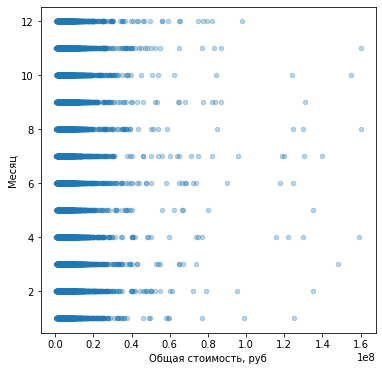

In [272]:
data.plot(y='month_exposition', x='last_price', kind ='scatter', figsize=(6, 6), alpha=0.3, xlabel='Общая стоимость, руб', ylabel='Месяц');

*There is no dependence on the day and month of publication.*

*Let's take a look at each year separately..*

In [273]:
data_spb.pivot_table(index='year_exposition', values ='last_price', aggfunc = ['count', 'mean', 'median'] )

,count,mean,median
,last_price,last_price,last_price
year_exposition,,,
2014,97,14650675.505,10500000.000
2015,817,9942960.660,6200000.000
2016,1798,8035627.994,5450000.000
2017,5340,7453173.260,5250000.000
2018,5212,7244878.190,5430000.000
2019,1922,7813485.332,5849500.000


In [274]:
data_lo.pivot_table(index='year_exposition', values ='last_price', aggfunc = ['count', 'mean', 'median'] )

,count,mean,median
,last_price,last_price,last_price
year_exposition,,,
2014,36,4939502.778,3500050.000
2015,336,4053433.812,3457500.000
2016,912,3561861.177,3200000.000
2017,2607,3472979.313,3100000.000
2018,3067,3458705.714,3150000.000
2019,858,3506097.372,3200000.000


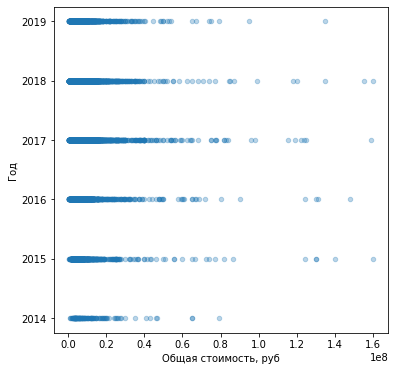

In [275]:
data.plot(y='year_exposition', x='last_price', kind ='scatter', figsize=(6, 6), alpha=0.3, xlabel='Общая стоимость, руб', ylabel='Год');

*Both in St. Petersburg and in the Leningrad region, there is a drawdown in prices in 2014-2018, while in 2019 there is a moderate increase.*

*Let's calculate the average price of one square meter in 10 settlements of the Leningrad region with the largest number of ads and St. Petersburg, for comparison.*

In [276]:
data_top = (data
  .groupby('locality_name')['price_sq_m'].agg(['count', 'mean', 'median'] )
  .sort_values(by = 'count', ascending = False)
  .head(11)
)
data_top

,count,mean,median
locality_name,,,
Санкт-Петербург,15186,114071.257,104634.124
Мурино,576,86003.330,86175.644
Кудрово,465,95460.650,95820.189
поселок Шушары,434,78714.733,77111.547
Всеволожск,388,68700.138,65789.474
Пушкин,358,103171.035,100000.000
поселок Парголово,326,90206.321,91780.224
Колпино,324,75121.712,74349.662
Гатчина,301,68634.397,67647.059


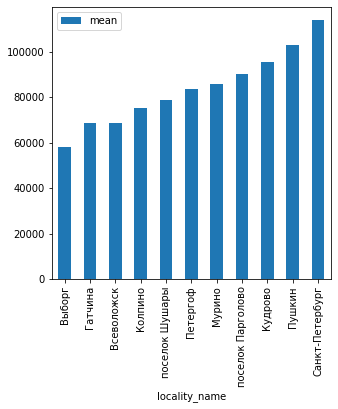

In [277]:
(
    data_top.sort_values(by = 'mean', ascending = True)
               .plot(kind='bar', y='mean', figsize= (5,5)) 
    
);    

*From the data for the Leningrad region, it turns out that for ten settlements with the largest number of ads, the cheapest cost of one square meter is in Vyborg, Gatchina and Vsevolozhsk (the average cost is 58238, 68634.68700 rubles, respectively), the most expensive housing is in Pushkin, Kudrovo and Pargolovo (103,171, 95,460, 90,206 rubles, respectively), while the difference between Pushkin and Vyborg is almost 50%. The cost per square meter in St. Petersburg is even higher and averages 114,071, as can be seen from the graph.*

*Consider the cost of housing depending on the distance from the center of St. Petersburg, for this, in the data for St. Petersburg, we will group the cost per square meter from the distance from the center and build a histogram*:

In [278]:
data_spb.groupby('city_cent_km')['price_sq_m'].mean().describe()

count       30.000
mean    115096.179
std      32489.287
min      72953.365
25%      94073.604
50%     105772.829
75%     128456.151
max     235126.395
Name: price_sq_m, dtype: float64

In [279]:
data_spb.groupby('city_cent_km')['price_sq_m'].agg(['count', 'mean', 'median'])

,count,mean,median
city_cent_km,,,
0.000,25,235126.395,155529.954
1.000,187,162119.228,128398.792
2.000,301,156433.763,123728.814
3.000,344,121329.638,108331.254
4.000,677,129901.193,117692.308
5.000,884,138488.721,126925.358
6.000,596,147370.522,129960.630
7.000,410,156859.215,127306.469
8.000,572,124121.023,122564.832


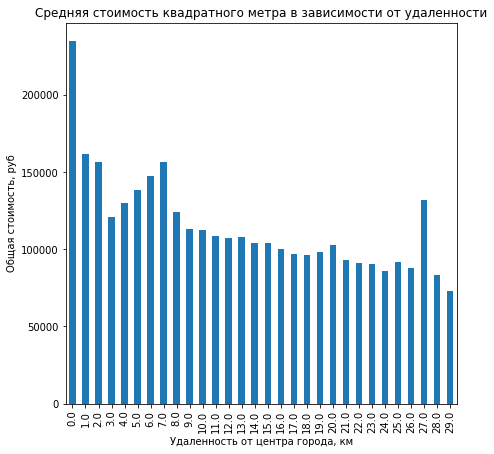

In [280]:
(
    data_spb
     .groupby('city_cent_km')['price_sq_m'].mean()
     .plot(kind = 'bar', x='city_cent_km', y= 'mean',title='Средняя стоимость квадратного метра в зависимости от удаленности', xlabel='Удаленность от центра города, км', ylabel='Общая стоимость, руб', figsize =(7,7))
);

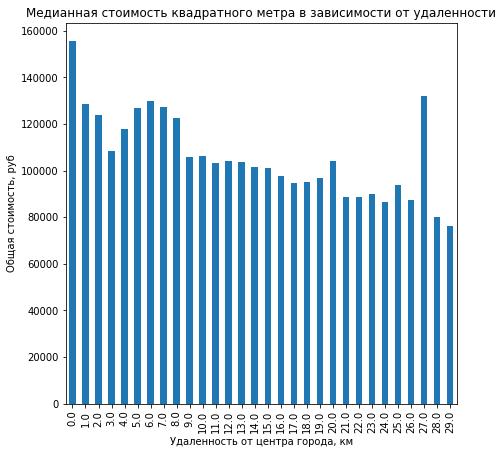

In [281]:
(
    data_spb
     .groupby('city_cent_km')['price_sq_m'].median()
     .plot(kind = 'bar', x='city_cent_km', y= 'median',title='Медианная стоимость квадратного метра в зависимости от удаленности', xlabel='Удаленность от центра города, км', ylabel='Общая стоимость, руб', figsize =(7,7))
);

*It can be seen from the graph that the cost is very expensive directly in the center - 235126.395 rubles, then it decreases to 72953.365 rubles for 29 km from the center. However, there are two peaks from 4 to 8 km (156859.215 rubles), as well as 27 km (132115.709), which is most likely due to the distribution of elite real estate and proximity to certain objects, these peaks require additional study. There are also differences in the median and average cost, which indicates other factors of influence and sample heterogeneity.*

<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
   <br/>After studying the data and grouping them according to some parameters, we obtained a number of dependencies of the cost of housing in ads, and identified the greatest factor affecting the cost. <br/> Also, according to the graphs, histograms and some dependencies, we made sure that the data was preprocessed correctly. <br/> Revealed Higher and lower cost of housing in the settlements of the Leningrad region. <br/> We got the dependence of the cost of housing on the distance from the center of St. Petersburg.

In [282]:
data_spb['price_sq_m']. describe()

count    15186.000
mean    114071.257
std      45399.692
min      15345.269
25%      90909.091
50%     104634.124
75%     124206.282
max     995983.936
Name: price_sq_m, dtype: float64

### General conclusion

<div style="border:solid pink 2px; padding: 20px">
    
    
 <br/>1. The cost of housing in St. Petersburg and the Leningrad region is very different, almost twice.
<br/>2. The cost of housing is largely influenced by the total area of ​​​​the premises.
<br/>3. The cost of residential premises on the first floors is generally lower and such premises are sold longer (ads for them hang longer than for housing on other floors).
<br/>4. The duration of the sale of an apartment is most often a little more than six months, in 75% of cases the sale will take place in 230 days.<br/>5. The duration of the sale of objects in the two regions is almost the same. <br/>6.Neither the day of the week nor the month in which the ad is placed does not affect the sale price in any way.<br/>7. In the Leningrad region, in popular settlements, the cheapest cost of one square meter is in Vyborg, Gatchina and Vsevolozhsk (the average cost is 58238, 68634.68700 rubles, respectively), the most expensive housing is in Pushkin, Kudrovo and Pargolovo (103171, 95460, 90206 rubles respectively), while the difference between Pushkin and Vyborg is almost 50%.<br/>8. In St. Petersburg, the minimum cost of housing is from 1,190,000,000 rubles, the median value is 5,500,000,000 rubles, the average cost per square meter is 114,071 rubles, the median value is 104,634 rubles. <br/>9. The distance from the center in St. Petersburg also affects the cost: a very expensive cost directly in the center - 235126.395 rubles, then it decreases to 72953.365 rubles for 29 km from the center. However, there are two peaks from 4 to 8 km (156859.215 rubles), as well as 27 km (132115.709), which is most likely due to the distribution of elite real estate and proximity to certain objects, these peaks require additional study.<br/>10. The data, in general, contains a lot of outliers and gaps, for example, 0.2% did not contain a settlement, many gaps in the map data, including in distance from the center, and the data contained many anomalies, such as studios with 2 balconies , which are sold on the day of the announcement, site moderators should pay attention to this.<br/>11. Least often ads for the sale of apartments are served in months with a large number of holidays: December, January, March. <br/>12. The reasons for the longest exposure of ads have not been identified either for St. Petersburg or for the Leningrad Region.